# **Credit EDA Assignment**


In [1]:
#Import the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import the useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Read the data set of "application_data" in inp0 and "previous_application" in inp1.
inp0 = pd.read_csv("application_data.csv")
inp1 = pd.read_csv("previous_application.csv")

**1. Structure of the application_data** : This will give us number of columns and rows

In [4]:
# Check structure of application_data 
inp0.shape

(307511, 122)

In [5]:
#Let us find out the details of application_data using info()
inp0.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

**2. Understanding the data:**

In [6]:
#Print the head of the dataframe
pd.set_option('display.max_columns', None)
inp0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

**Observation 1 :** After going through the dataframe it can be noticed that tha columns such as -  "DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH" have negative values which seems to be invalid. This is something that we need to check and work upon.

In [7]:
#Changing the negative values to positive
inp0["DAYS_BIRTH"] = abs(inp0.DAYS_BIRTH)
inp0["DAYS_EMPLOYED"] = abs(inp0.DAYS_EMPLOYED)
inp0["DAYS_REGISTRATION"] = abs(inp0.DAYS_REGISTRATION)
inp0["DAYS_ID_PUBLISH"] = abs(inp0.DAYS_ID_PUBLISH)

In [8]:
inp0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120          NaN           1               1                0   
1              291          NaN           1               1                0   
2             2531         26.0           1               1                1   
3             2437          NaN           1               1                0   
4             3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

Let's check if we have any value in negative's for the above columns.


In [9]:
#Checking for the DAYS_BIRTH
Birth1 =  inp0[inp0["DAYS_BIRTH"]<0]
Birth1

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, HOUSETYPE_MODE, TOTALAREA_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, ...]
Index: []

In [10]:
#Checking for the "DAYS_EMPLOYED"
employed1 = inp0[inp0["DAYS_EMPLOYED"]<0]
employed1

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, HOUSETYPE_MODE, TOTALAREA_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, ...]
Index: []

Similarly we can check for the "DAYS_REGISTRATION" AND "DAYS_ID_PUBLISH" columns.

In [11]:
#Taking a look at description of the application_data(inp0) data set
inp0.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868   16036.995067   67724.742149   
std                      0.013831    4363.988632  139443.751806   
min                      0.000290    7489.000000       0.000000   
25%                      0.010006   12413.000000     933.000000   
50%                      0.018850   15750.000000    2219.000000   
75%                      0.028663   19682.000000    5707.000000   
max                      0.072508   25229.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean         4986.120328      2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min             0.000000         0.000000       0.000000       0.000000   
25%          2010.000000      1720.000000       5.000000       1.000000   
50%          4504.000000      3254.000000       9.000000       1.000000   
75%          7479.500000      4299.000000      15.000000       1.000000   
max         24672.000000      7197.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

####  3. Data Quality Check


In [12]:
# 1.Extracting the percentage of missing values for all the columns
pd.set_option('display.max_rows',None)
round((inp0.isnull().sum())/len(inp0)*100,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

As it can be seen that there are 19 variables that is related to documents.
It will be better to have one column named "Total_Flag_Document" that contains sum of all these 'FLAG_DOCUMENT_" columns.
We will decide later whether this data could help in our analysis or not. Right now just having a single column for those 19 unwamted columns.

In [13]:
#2(a).Adding unwanted columns into into one.
inp0['TOTAL_FLAG_DOCUMENT']=inp0['FLAG_DOCUMENT_2']+inp0['FLAG_DOCUMENT_3']+inp0['FLAG_DOCUMENT_4']+ inp0['FLAG_DOCUMENT_5']+inp0['FLAG_DOCUMENT_6']+inp0['FLAG_DOCUMENT_7']+inp0['FLAG_DOCUMENT_8']+inp0['FLAG_DOCUMENT_9']+inp0['FLAG_DOCUMENT_10']+inp0['FLAG_DOCUMENT_11']+inp0['FLAG_DOCUMENT_12']+inp0['FLAG_DOCUMENT_13']+inp0['FLAG_DOCUMENT_14']+inp0['FLAG_DOCUMENT_15']+inp0['FLAG_DOCUMENT_16']+inp0['FLAG_DOCUMENT_17']+inp0['FLAG_DOCUMENT_18']+inp0['FLAG_DOCUMENT_19']+inp0['FLAG_DOCUMENT_20']+inp0['FLAG_DOCUMENT_21']

In [14]:
# 2(b). Dropping the columns and finding the shape of the data set now
inp0.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'], axis = 1, inplace = True)
inp0.shape

(307511, 103)

In [15]:
#Again reading the data set
inp0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120          NaN           1               1                0   
1              291          NaN           1               1                0   
2             2531         26.0           1               1                1   
3             2437          NaN           1               1                0   
4             3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [16]:
#Understanding the percentage of total documents available.
inp0.TOTAL_FLAG_DOCUMENT.value_counts(normalize = True)*100

1    87.819948
0     9.609087
2     2.517634
3     0.053006
4     0.000325
Name: TOTAL_FLAG_DOCUMENT, dtype: float64

**4. Deleting the unwanted columns**

In [17]:
#Deleting the unwanted columns and finding the new structure of the data set.
unwanted_cols = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE']
inp0.drop(labels = unwanted_cols, axis = 1, inplace = True)
inp0.shape

(307511, 94)

**5. Working On Missing Values**

In [18]:
# Extracting the percentage of missing values for all the columns again
pd.set_option('display.max_rows',None)
round((inp0.isnull().sum())/len(inp0)*100,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
OCCUPATION_TYPE                 31.35
CNT_FAM_MEMBERS                  0.00
WEEKDAY_APPR_PROCESS_START       0.00
HOUR_APPR_PROCESS_START          0.00
REG_REGION_N

**5.a Dropping the Missing values**

There are many columns with more than 40% of missing data. So, our next step is to drop the variables having more than 40% of missing values.    
Note: But, it is not always adviced to delete the rows and columns as it may hamper the data. It always depends upon the situation.
Imputing values on 40% above missing data won't help us much in our analysis so deciding to dlete the data.

In [19]:
#Finding the columns having more than 40% of Missing values
missing_values_col = round((inp0.isnull().sum())/len(inp0)*100,2)
missing_values_col = missing_values_col[missing_values_col.values>(0.40*len(missing_values_col))]
missing_values_col.sort_values(ascending = False)

COMMONAREA_AVG                  69.87
COMMONAREA_MEDI                 69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MODE           68.35
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
FLOORSMIN_AVG                   67.85
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
YEARS_BUILD_MEDI                66.50
OWN_CAR_AGE                     65.99
LANDAREA_MODE                   59.38
LANDAREA_MEDI                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MODE               58.52
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [20]:
#Finding the length of columns having more than 40% of Missing values
len(missing_values_col)

49

In [21]:
#Dropping the columns having more than 40% missing values

#Making a list of missing values or null values greater than 40%.
null_values_list = list(missing_values_col.index.values)    

#Dropping the columns
inp0.drop(labels = null_values_list, inplace=True, axis = 1)

In [22]:
#Checking the shape after deleting the list of missing value columns more than 40%.
inp0.shape

(307511, 45)

**5.b Imputing the missing values**

Now, let us work on the columns that has missing values between 1% to 40%.
We will work on each column one by one and decide what to do with null values.
The next step is to decide whether we can impute the values using the mean, mode or median. 


In [23]:
(inp0.isna().sum()/len(inp0)*100).sort_values(ascending = False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
ORGANIZATION_TYPE               0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_WORK_CITY          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_WORK_REGION      0.000000
SK_ID_CURR      

#### 5.b.i Handling OCCUPATION_TYPE column

Here, OCCUPATION_TYPE has around 30% of missing data. Let us work on this column and see what can be done.

In [24]:
inp0.OCCUPATION_TYPE.value_counts(dropna=False)

NaN                      96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [25]:
#Let get more details for OCCUPATION_TYPE
inp0.OCCUPATION_TYPE.describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

Let us look at the datset to understand if there is anything that we can infer to. 

In [26]:
inp0.head(50)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
1       100003       0         Cash loans           F            N   
2       100004       0    Revolving loans           M            Y   
3       100006       0         Cash loans           F            N   
4       100007       0         Cash loans           M            N   
5       100008       0         Cash loans           M            N   
6       100009       0         Cash loans           F            Y   
7       100010       0         Cash loans           M            Y   
8       100011       0         Cash loans           F            N   
9       100012       0    Revolving loans           M            N   
10      100014       0         Cash loans           F            N   
11      100015       0         Cash loans           F            N   
12      100016       0         Cash loans           F            N   
13      100017       0         Cash loans           M            Y   
14      100018       0         Cash loans           F            N   
15      100019       0         Cash loans           M            Y   
16      100020       0         Cash loans           M            N   
17      100021       0    Revolving loans           F            N   
18      100022       0    Revolving loans           F            N   
19      100023       0         Cash loans           F            N   
20      100024       0    Revolving loans           M            Y   
21      100025       0         Cash loans           F            Y   
22      100026       0         Cash loans           F            N   
23      100027       0         Cash loans           F            N   
24      100029       0         Cash loans           M            Y   
25      100030       0         Cash loans           F            N   
26      100031       1         Cash loans           F            N   
27      100032       0         Cash loans           M            N   
28      100033       0         Cash loans           M            Y   
29      100034       0    Revolving loans           M            N   
30      100035       0         Cash loans           F            N   
31      100036       0         Cash loans           F            N   
32      100037       0         Cash loans           F            N   
33      100039       0         Cash loans           M            Y   
34      100040       0         Cash loans           F            N   
35      100041       0         Cash loans           F            N   
36      100043       0         Cash loans           F            N   
37      100044       0         Cash loans           M            N   
38      100045       0         Cash loans           F            N   
39      100046       0    Revolving loans           M            Y   
40      100047       1         Cash loans           M            N   
41      100048       0         Cash loans           F            N   
42      100049       1         Cash loans           F            N   
43      100050       0         Cash loans           F            N   
44      100051       0         Cash loans           M            N   
45      100052       0    Revolving loans           F            N   
46      100053       0         Cash loans           F            N   
47      100054       0         Cash loans           F            N   
48      100055       0         Cash loans           F            N   
49      100056       0         Cash loans           M            Y   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0        202500.000    406597.5      24700.5   
1                N             0        270000.000   1293502.5      35698.5   
2                Y             0         67500.000    135000.0       6750.0   
3                Y             0        135000.000    312682.5      29686.5   
4                Y             0      

By Looking at the data set we can find that values are missing in 'OCCUPATION_TYPE' column for some of the 'NAME_INCOME_TYPE'column such as Pensioner, working,commercial assosciate. Let us check the relationship between two columns.

In [27]:
#Extracting percentage of NAME_INCOME_TYPE column having null values in OCCUPATION_TYPE column
inp0[inp0["OCCUPATION_TYPE"].isnull()]["NAME_INCOME_TYPE"].value_counts(normalize = True)*100

Pensioner               57.429636
Working                 25.853036
Commercial associate    12.757415
State servant            3.928790
Unemployed               0.022824
Student                  0.005187
Businessman              0.002075
Maternity leave          0.001037
Name: NAME_INCOME_TYPE, dtype: float64

It can be seen that Pensioner has around 57% of the 'OCCUPATION_TYPE' missing. And around 26% of OCCUPATION_TYPE missing for Working. 

In [28]:
#Extracting numbers of NAME_INCOME_TYPE column having null values in OCCUPATION_TYPE column
inp0[inp0["OCCUPATION_TYPE"].isnull()]["NAME_INCOME_TYPE"].value_counts()

Pensioner               55357
Working                 24920
Commercial associate    12297
State servant            3787
Unemployed                 22
Student                     5
Businessman                 2
Maternity leave             1
Name: NAME_INCOME_TYPE, dtype: int64

Here, it can be concluded that the Pensioner has almost null values in the OCCUPATION_TYPE column and rest of the Income type is very less as compared to Pensioners. So, it is of type MAR(Missing at Random). So we can either choose to let it as it is or impute the null values with something else.Here creating a new category "Other" to replace will keep our data intact.

In [29]:
#Filling the null values with new Category other
inp0.OCCUPATION_TYPE.fillna(value = "Others", inplace = True)

In [30]:
#Let us check whether OCCUPATION_TYPE has been updated or not
inp0.OCCUPATION_TYPE.value_counts(dropna=False)

Others                   96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

**5.b(ii) Handling "EXT_SOURCE_3" and "EXT_SOURCE_2" columns**


EXT_SOURCE_3  has around 20% missing values and EXT_SOURCE_2 has very less missing values.Let us try to find out how can we impute these.

In [31]:
#Understanding EXT_SOURCE_3
inp0.EXT_SOURCE_3.value_counts()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
0.581484    1141
0.689479    1138
0.595456    1136
0.554947    1132
0.621226    1109
0.657784    1092
0.607557    1067
0.643026    1066
0.450747    1064
0.626304    1054
0.673830    1030
0.651260    1029
0.511892    1026
0.706205     992
0.553165     984
0.593718     978
0.634706     969
0.740799     961
0.681706     959
0.565608     956
0.728141     953
0.771362     947
0.576209     943
0.586740     942
0.656158     931
0.631355     929
0.484851     922
0.709189     919
0.665855     912
0.684828     911
0.538863     911
0.617826     907
0.591977     904
0.513694     895
0.683269     895
0.579727     895
0.000527     886
0.733815     880
0.619528     879
0.501075     879
0.508287     877
0.754406     874
0.712155     867
0.832785     865
0.558507     864
0.524496     860
0.633032     854
0.659406     850
0.812823     849
0.636376     848
0.680139     837
0.474051     837
0.647977     837
0.546023     8

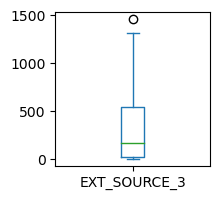

In [32]:
# Let us plot a box plot to understand it more.
plt.figure(figsize=[2,2])
inp0.EXT_SOURCE_3.value_counts().plot(kind = "box")
plt.show()


In [33]:
#Checking for EXT_SOURCE_2 as well.
inp0.EXT_SOURCE_2.value_counts().sort_values(ascending = False)

2.858979e-01    721
2.622584e-01    417
2.652563e-01    343
1.596792e-01    322
2.653117e-01    306
2.665198e-01    244
2.631436e-01    243
1.621446e-01    238
1.621921e-01    234
1.631870e-01    184
1.604053e-01    173
1.915259e-01    169
2.453496e-01    167
3.542247e-01    149
1.942664e-01    140
1.923161e-01    131
3.572820e-01    129
1.942151e-01    127
1.953538e-01    123
3.551256e-01    113
3.411229e-01    110
2.556162e-01     92
3.585685e-01     90
2.930897e-01     85
2.620553e-01     84
3.441915e-01     84
3.573422e-01     81
2.547600e-01     80
3.420278e-01     73
2.961436e-01     72
2.007754e-01     71
3.442507e-01     69
1.542654e-01     67
2.290030e-01     67
2.962028e-01     67
3.454859e-01     67
2.746463e-01     66
2.974306e-01     64
2.598076e-01     64
3.102603e-01     61
2.629359e-01     61
1.548483e-01     59
2.533716e-01     59
2.650476e-01     59
2.563408e-01     58
5.806869e-01     57
2.632411e-01     56
1.535706e-01     55
6.019534e-01     55
2.015837e-01     54


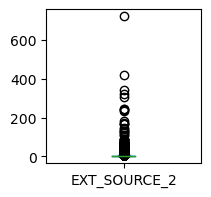

In [34]:
# Let us plot a box plot to understand it more.
plt.figure(figsize=[2,2])
inp0.EXT_SOURCE_2.value_counts().plot(kind = "box")
plt.show()

In both the cases we can see outliers so it well be better to impute the EXT_SOURCE_2 and EXT_SOURCE_3 with their median.

In [35]:
median_value_2 = inp0.EXT_SOURCE_2.median()
median_value_3 = inp0.EXT_SOURCE_3.median()
inp0.EXT_SOURCE_2.fillna(value = median_value_2, inplace = True)
inp0.EXT_SOURCE_3.fillna(value = median_value_3, inplace = True)

In [36]:
inp0.isnull().sum().sort_values(ascending = False).head(20)

AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
NAME_TYPE_SUITE                1292
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
OBS_30_CNT_SOCIAL_CIRCLE       1021
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
HOUR_APPR_PROCESS_START           0
EXT_SOURCE_3                      0
EXT_SOURCE_2                      0
ORGANIZATION_TYPE                 0
LIVE_CITY_NOT_WORK_CITY           0
REG_CITY_NOT_WORK_CITY            0
dtype: int64

**5.b(iii) Handling AMT_ANNUITY**

In [37]:
#Handling AMT_ANNUITY 
inp0.AMT_ANNUITY.value_counts(dropna = False)

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
11250.0     1459
26217.0     1453
20250.0     1345
12375.0     1339
31653.0     1269
26640.0     1236
22500.0     1234
16875.0     1213
36459.0     1191
33025.5      938
26446.5      916
22018.5      904
23773.5      875
25537.5      836
26316.0      829
31261.5      822
21906.0      800
7875.0       741
40320.0      703
21888.0      688
32602.5      687
15750.0      684
27000.0      681
19867.5      653
33750.0      652
21775.5      643
29970.0      643
30528.0      626
45000.0      570
32895.0      564
14350.5      564
14751.0      551
23494.5      540
42790.5      527
26086.5      507
29250.0      506
23931.0      501
31630.5      499
31522.5      495
24939.0      491
16456.5      490
19125.0      471
21109.5      466
13963.5      462
30078.0      450
28408.5      449
45333.0      441
46084.5      436
67500.0      431
16011.0      419
24543.0      418
35937.0      418
25321.5      417
24246.0      4

In [38]:
#We can take the median of this column to fill the null values.
median_annuity = inp0.AMT_ANNUITY.median()

In [39]:
inp0.AMT_ANNUITY.fillna(value = median_annuity, inplace = True)

**5.b(iv) Handling CNT_FAM_MEMBERS**

In [40]:
#Let us find out the rows having null values in the CNT_FAM_MEMBERS column. 
inp0[inp0["CNT_FAM_MEMBERS"].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
41982       148605       0    Revolving loans           M            N   
187348      317181       0    Revolving loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                Y             0          450000.0    675000.0   
187348               Y             0          202500.0    585000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
41982       33750.0              NaN             NaN  Commercial associate   
187348      29250.0              NaN             NaN  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary            Unknown  Municipal apartment   
187348    Higher education            Unknown    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
41982                     0.015221       12396           1161   
187348                    0.031329       12844            232   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
41982              3265.0             4489        Managers              NaN   
187348             1597.0             1571     Accountants              NaN   

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
41982                    THURSDAY                       15   
187348                     FRIDAY                       14   

        REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
41982                            0                           1   
187348                           0                           0   

        LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
41982                             1                       0   
187348                            0                       0   

        REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
41982                        1                        1   
187348                       0                        0   

             ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
41982                Insurance      0.700618      0.535276   
187348  Business Entity Type 2      0.645168      0.670652   

        OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
41982                        3.0                       0.0   
187348                       1.0                       0.0   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
41982                        3.0                       0.0   
187348                       1.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
41982                          NaN                        NaN   
187348                         0.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
41982                          NaN                        NaN   
187348                         0.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
41982                         NaN                         NaN   
187348                        0.0                         1.0   

        TOTAL_FLAG_DOCUMENT  
41982                     1  
187348                    1

We can check the CNT_CHILDREN column, this will help us decide what the value to impute. Becuase let us suppose if the Children count is 4 then we can't assign 2 in the respective column of "CNT_FAM_MEMBERS".


In [41]:
inp0.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [42]:
#We can fill NaN in CNT_FAM_MEMBERS column with 2 since it is the most occuring.
inp0.CNT_FAM_MEMBERS.fillna(value = 2.0, inplace= True)

**5.b(v) Handling all the columns of CNT_SOCIAL_CIRCLE**

In [43]:
inp0.isnull().sum().sort_values(ascending = False).head(15)

AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
NAME_TYPE_SUITE                 1292
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
AMT_GOODS_PRICE                  278
REG_REGION_NOT_WORK_REGION         0
LIVE_CITY_NOT_WORK_CITY            0
LIVE_REGION_NOT_WORK_REGION        0
dtype: int64

In [44]:
#Fetching count
inp0.DEF_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
34.0         1
8.0          1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

Here, the data has outliers and this is skew as well. So we will impute the values using mode/median. Similarly, we can check for all other columns.

Let us impute the values of "DEF_30_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE"columns using the mode of their respective values.

In [45]:
#Imputing the null values with mode
inp0.DEF_30_CNT_SOCIAL_CIRCLE.fillna(value = inp0.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0] ,inplace = True)
inp0.OBS_30_CNT_SOCIAL_CIRCLE.fillna(value = inp0.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0] ,inplace = True)
inp0.DEF_60_CNT_SOCIAL_CIRCLE.fillna(value = inp0.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True)
inp0.OBS_60_CNT_SOCIAL_CIRCLE.fillna(value = inp0.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True)

#### 5.b(vi) Handling NAME_TYPE_SUITE

In [46]:
inp0.isnull().sum().sort_values(ascending = False).head(15)

AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
NAME_TYPE_SUITE                 1292
AMT_GOODS_PRICE                  278
EXT_SOURCE_2                       0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE                  0
dtype: int64

In [47]:
#Fetching the total count of each variables
inp0.NAME_TYPE_SUITE.value_counts(dropna=False)

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [48]:
#Finding the mode of NAME_TYPE_SUITE column
inp0.NAME_TYPE_SUITE.fillna(value = inp0.NAME_TYPE_SUITE.mode()[0], inplace = True)

Since "NAME_TYPE_SUITE" is an object type variable so we can impute null values with the mode of NAME_TYPE_SUITE column.

In [49]:
#Fetching the count of null values
inp0.isnull().sum().sort_values(ascending = False).head(10)

AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_GOODS_PRICE                 278
SK_ID_CURR                        0
ORGANIZATION_TYPE                 0
REG_REGION_NOT_LIVE_REGION        0
dtype: int64

#### 5.b(vii) Handling AMT_GOODS_PRICE column

In [50]:
inp0.AMT_GOODS_PRICE.value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
180000.0     10123
454500.0      9157
1125000.0     9050
135000.0      8206
315000.0      5225
1350000.0     5037
679500.0      4824
238500.0      4696
360000.0      4553
247500.0      4318
463500.0      3873
540000.0      3763
495000.0      3463
202500.0      3222
90000.0       3169
405000.0      2954
472500.0      2828
157500.0      2704
585000.0      2647
337500.0      2501
229500.0      2438
112500.0      2170
630000.0      2164
1800000.0     2146
720000.0      1922
1575000.0     1875
688500.0      1824
292500.0      1708
148500.0      1674
477000.0      1611
810000.0      1568
67500.0       1505
697500.0      1408
382500.0      1396
765000.0      1396
904500.0      1375
283500.0      1372
252000.0      1368
234000.0      1279
45000.0       1169
945000.0      1161
855000.0      1113
1129500.0     1109
913500.0      1065
328500.0      1059
459000.0      1023
193500.0      1007
103500.0    

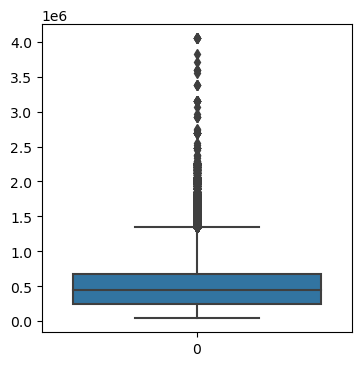

In [51]:
#Let us understand the outliers using box plot
plt.figure(figsize = [4,4])
sns.boxplot(inp0["AMT_GOODS_PRICE"])
plt.show()

Since it has outliers, we can impute the values using the median/mode.

In [52]:
#Imputing the value with the median.
mode_amt = inp0.AMT_GOODS_PRICE.median()
inp0.AMT_GOODS_PRICE.fillna(value = mode_amt, inplace = True)

In [53]:
inp0.isnull().sum().sort_values(ascending = False).head(8)

AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
SK_ID_CURR                        0
ORGANIZATION_TYPE                 0
dtype: int64

#### 5.b(viii) Handling the rest of the columns

We can impute the columns :-(AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_HOUR) with their respective mode values.

In [54]:
#Imputing the null values with the mode of their respective values.
inp0.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(value = inp0.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace = True)
inp0.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(value = inp0.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace = True)
inp0.AMT_REQ_CREDIT_BUREAU_QRT.fillna(value = inp0.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace = True)
inp0.AMT_REQ_CREDIT_BUREAU_MON.fillna(value = inp0.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace = True)
inp0.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(value = inp0.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace = True)
inp0.AMT_REQ_CREDIT_BUREAU_DAY.fillna(value = inp0.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace = True)

In [55]:
#Checking if there is any column with the null value left or not
inp0.isna().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_

**6 Check The Datatypes**

In [56]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

We can see columns having the float values. Let us change them to integer type.


In [57]:
#Changing data type from float to int
inp0 = inp0.astype({"DAYS_REGISTRATION":int,"AMT_REQ_CREDIT_BUREAU_HOUR":int, "AMT_REQ_CREDIT_BUREAU_DAY":int,"AMT_REQ_CREDIT_BUREAU_WEEK":int, "AMT_REQ_CREDIT_BUREAU_MON":int,"AMT_REQ_CREDIT_BUREAU_QRT":int, "AMT_REQ_CREDIT_BUREAU_YEAR":int,"OBS_30_CNT_SOCIAL_CIRCLE":int,"DEF_30_CNT_SOCIAL_CIRCLE":int,"OBS_60_CNT_SOCIAL_CIRCLE":int,"DEF_60_CNT_SOCIAL_CIRCLE":int})

In [58]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

**7 Dealing with the Unknown category**

In [59]:
inp0.head(50)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
1       100003       0         Cash loans           F            N   
2       100004       0    Revolving loans           M            Y   
3       100006       0         Cash loans           F            N   
4       100007       0         Cash loans           M            N   
5       100008       0         Cash loans           M            N   
6       100009       0         Cash loans           F            Y   
7       100010       0         Cash loans           M            Y   
8       100011       0         Cash loans           F            N   
9       100012       0    Revolving loans           M            N   
10      100014       0         Cash loans           F            N   
11      100015       0         Cash loans           F            N   
12      100016       0         Cash loans           F            N   
13      100017       0         Cash loans           M            Y   
14      100018       0         Cash loans           F            N   
15      100019       0         Cash loans           M            Y   
16      100020       0         Cash loans           M            N   
17      100021       0    Revolving loans           F            N   
18      100022       0    Revolving loans           F            N   
19      100023       0         Cash loans           F            N   
20      100024       0    Revolving loans           M            Y   
21      100025       0         Cash loans           F            Y   
22      100026       0         Cash loans           F            N   
23      100027       0         Cash loans           F            N   
24      100029       0         Cash loans           M            Y   
25      100030       0         Cash loans           F            N   
26      100031       1         Cash loans           F            N   
27      100032       0         Cash loans           M            N   
28      100033       0         Cash loans           M            Y   
29      100034       0    Revolving loans           M            N   
30      100035       0         Cash loans           F            N   
31      100036       0         Cash loans           F            N   
32      100037       0         Cash loans           F            N   
33      100039       0         Cash loans           M            Y   
34      100040       0         Cash loans           F            N   
35      100041       0         Cash loans           F            N   
36      100043       0         Cash loans           F            N   
37      100044       0         Cash loans           M            N   
38      100045       0         Cash loans           F            N   
39      100046       0    Revolving loans           M            Y   
40      100047       1         Cash loans           M            N   
41      100048       0         Cash loans           F            N   
42      100049       1         Cash loans           F            N   
43      100050       0         Cash loans           F            N   
44      100051       0         Cash loans           M            N   
45      100052       0    Revolving loans           F            N   
46      100053       0         Cash loans           F            N   
47      100054       0         Cash loans           F            N   
48      100055       0         Cash loans           F            N   
49      100056       0         Cash loans           M            Y   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0        202500.000    406597.5      24700.5   
1                N             0        270000.000   1293502.5      35698.5   
2                Y             0         67500.000    135000.0       6750.0   
3                Y             0        135000.000    312682.5      29686.5   
4                Y             0      

As we can see in "ORGANIZATION_TYPE" column that some values are XNA. So we need to replace it with new category. Let us take "Unknown" as a new category and replace XNA with "unknown".


In [60]:
inp0.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [61]:
inp0.ORGANIZATION_TYPE.replace("XNA","Unknown", inplace = True)

In [62]:
 inp0.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Unknown                   55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

Here, we can see that the values names are too big. So we can shorten it. For eg: Trade has been divided as type 1 , type 2 , type 3  and so on. So, it will be better to just assign one values to these i.e. Trade. This will help us more in our analysis.

In [63]:
inp0["ORGANIZATION_TYPE"] = inp0.ORGANIZATION_TYPE.apply(lambda x: x.split(":")[0] if "type" in x else x )
inp0["ORGANIZATION_TYPE"] = inp0.ORGANIZATION_TYPE.apply(lambda x: x.split()[0] if "Type" in x else x )

In [64]:
inp0.ORGANIZATION_TYPE.value_counts()

Business               84529
Unknown                55374
Self-employed          38412
Other                  16683
Trade                  14315
Industry               14311
Medicine               11193
Government             10404
Transport               8990
School                  8893
Kindergarten            6880
Construction            6721
Security                3247
Housing                 2958
Military                2634
Bank                    2507
Agriculture             2454
Police                  2341
Postal                  2157
Security Ministries     1974
Restaurant              1811
Services                1575
University              1327
Hotel                    966
Electricity              950
Insurance                597
Telecom                  577
Emergency                560
Advertising              429
Realtor                  396
Culture                  379
Mobile                   317
Legal Services           305
Cleaning                 260
Religion      

 **7.2 Gender**

In [65]:
inp0.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

We can replace these 4 NA with F. As the data is small or we can choose to delete as well. But I will be imputing it with F here. 


In [66]:
inp0.CODE_GENDER.replace("XNA", "F", inplace = True)

In [67]:
inp0.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [68]:
inp0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637               3648   
1                    0.003541       16765           1188               1186   
2                    0.010032       19046            225               4260   
3                    0.008019       19005           3039               9833   
4                    0.028663       19932           3038               4311   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             2120        Laborers              1.0   
1              291      Core staff              2.0   
2             2531        Laborers              1.0   
3             2437        Laborers              2.0   
4             3458      Core staff              1.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  \
0                       0                        0          Business   
1                       0                        0            School   
2                       0                        0        Government   
3                       0                        0          Business   
4                       1                        1          Religion   

   EXT_SOURCE_2  EXT_SOURCE

Here, DAYS_Birth column can be inferred to find the age of people.Here DAYS_BIRTH is divided by 365.25(considering year to be a leap year) 

In [69]:
#Creating a new column AGE_YEARS
inp0["AGE_YEARS"] = (inp0["DAYS_BIRTH"]/365.25).astype("int")


In [70]:
inp0 = inp0.drop('DAYS_BIRTH', axis = 1)

In [71]:
inp0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801            637               3648   
1                    0.003541           1188               1186   
2                    0.010032            225               4260   
3                    0.008019           3039               9833   
4                    0.028663           3038               4311   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             2120        Laborers              1.0   
1              291      Core staff              2.0   
2             2531        Laborers              1.0   
3             2437        Laborers              2.0   
4             3458      Core staff              1.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  \
0                       0                        0          Business   
1                       0                        0            School   
2                       0                        0        Government   
3                       0                        0          Business   
4                       1                        1          Religion   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376           

**7.3 Converting "Y" and "N" to "1" and "0"**

Here, we can see columns "FLAG_OWN_CAR" and "FLAG_OWN_REALTY" has the values in "Y" and "N". So it is always better to change the Y as "1" and N as "0" so that it can help us in our analysis.

In [72]:
inp0["FLAG_OWN_CAR"] = inp0.FLAG_OWN_CAR.replace(["Y","N"], ["1","0"]).astype(int)
inp0["FLAG_OWN_REALTY"]=inp0.FLAG_OWN_REALTY.replace(["Y","N"], ["1","0"]).astype(int)


In [73]:
inp0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801            637               3648   
1                    0.003541           1188               1186   
2                    0.010032            225               4260   
3                    0.008019           3039               9833   
4                    0.028663           3038               4311   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             2120        Laborers              1.0   
1              291      Core staff              2.0   
2             2531        Laborers              1.0   
3             2437        Laborers              2.0   
4             3458      Core staff              1.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  \
0                       0                        0          Business   
1                       0                        0            School   
2                       0                        0        Government   
3                       0                        0          Business   
4                       1                        1          Religion   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.13937

In [74]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  int32  
 5   FLAG_OWN_REALTY              307511 non-null  int32  
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

**Binning the columns with larger values**

Some of the column has large nominal values. Let's simplify it using bins. The columns that we are going to simplify is "AMT_INCOME_TOTAL" and "AMT_CREDIT".

In [75]:
inp0.AMT_INCOME_TOTAL.max()

117000000.0

In [76]:
inp0.AMT_CREDIT.max()

4050000.0

In [77]:
#Binning "AMT_INCOME_TOTAL" to "AMT_INCOME_RANGE"
inp0["AMT_INCOME_RANGE"] = pd.qcut(inp0["AMT_INCOME_TOTAL"],q=[0,0.25,0.50,0.75,1] , labels=["Low", "Medium", "High","Very High"])

In [78]:
inp0.AMT_INCOME_RANGE.value_counts(dropna = False)

Low          100578
High          82213
Very High     71538
Medium        53182
Name: AMT_INCOME_RANGE, dtype: int64

In [79]:
#Binning "AMT_CREDIT" to "AMT_CREDIT_RANGE"
inp0["AMT_CREDIT_RANGE"] = pd.qcut(inp0["AMT_CREDIT"],q=[0,0.25,0.50,0.75,1] , labels=["Low", "Medium", "High","Very High"])

In [80]:
inp0.AMT_CREDIT_RANGE.value_counts(dropna = False)

Low          78421
High         77786
Very High    75876
Medium       75428
Name: AMT_CREDIT_RANGE, dtype: int64

In [81]:
inp0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801            637               3648   
1                    0.003541           1188               1186   
2                    0.010032            225               4260   
3                    0.008019           3039               9833   
4                    0.028663           3038               4311   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             2120        Laborers              1.0   
1              291      Core staff              2.0   
2             2531        Laborers              1.0   
3             2437        Laborers              2.0   
4             3458      Core staff              1.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  \
0                       0                        0          Business   
1                       0                        0            School   
2                       0                        0        Government   
3                       0                        0          Business   
4                       1                        1          Religion   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.13937

**8. Outlier Analysis**

For analysisng the outliers of the columns we need to fetch numerical data only 

In [82]:
numeric_cols = inp0.select_dtypes(include = "number").columns
len(numeric_cols)

35

Let us find outliers for  'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', and let us see what inferences can be made.

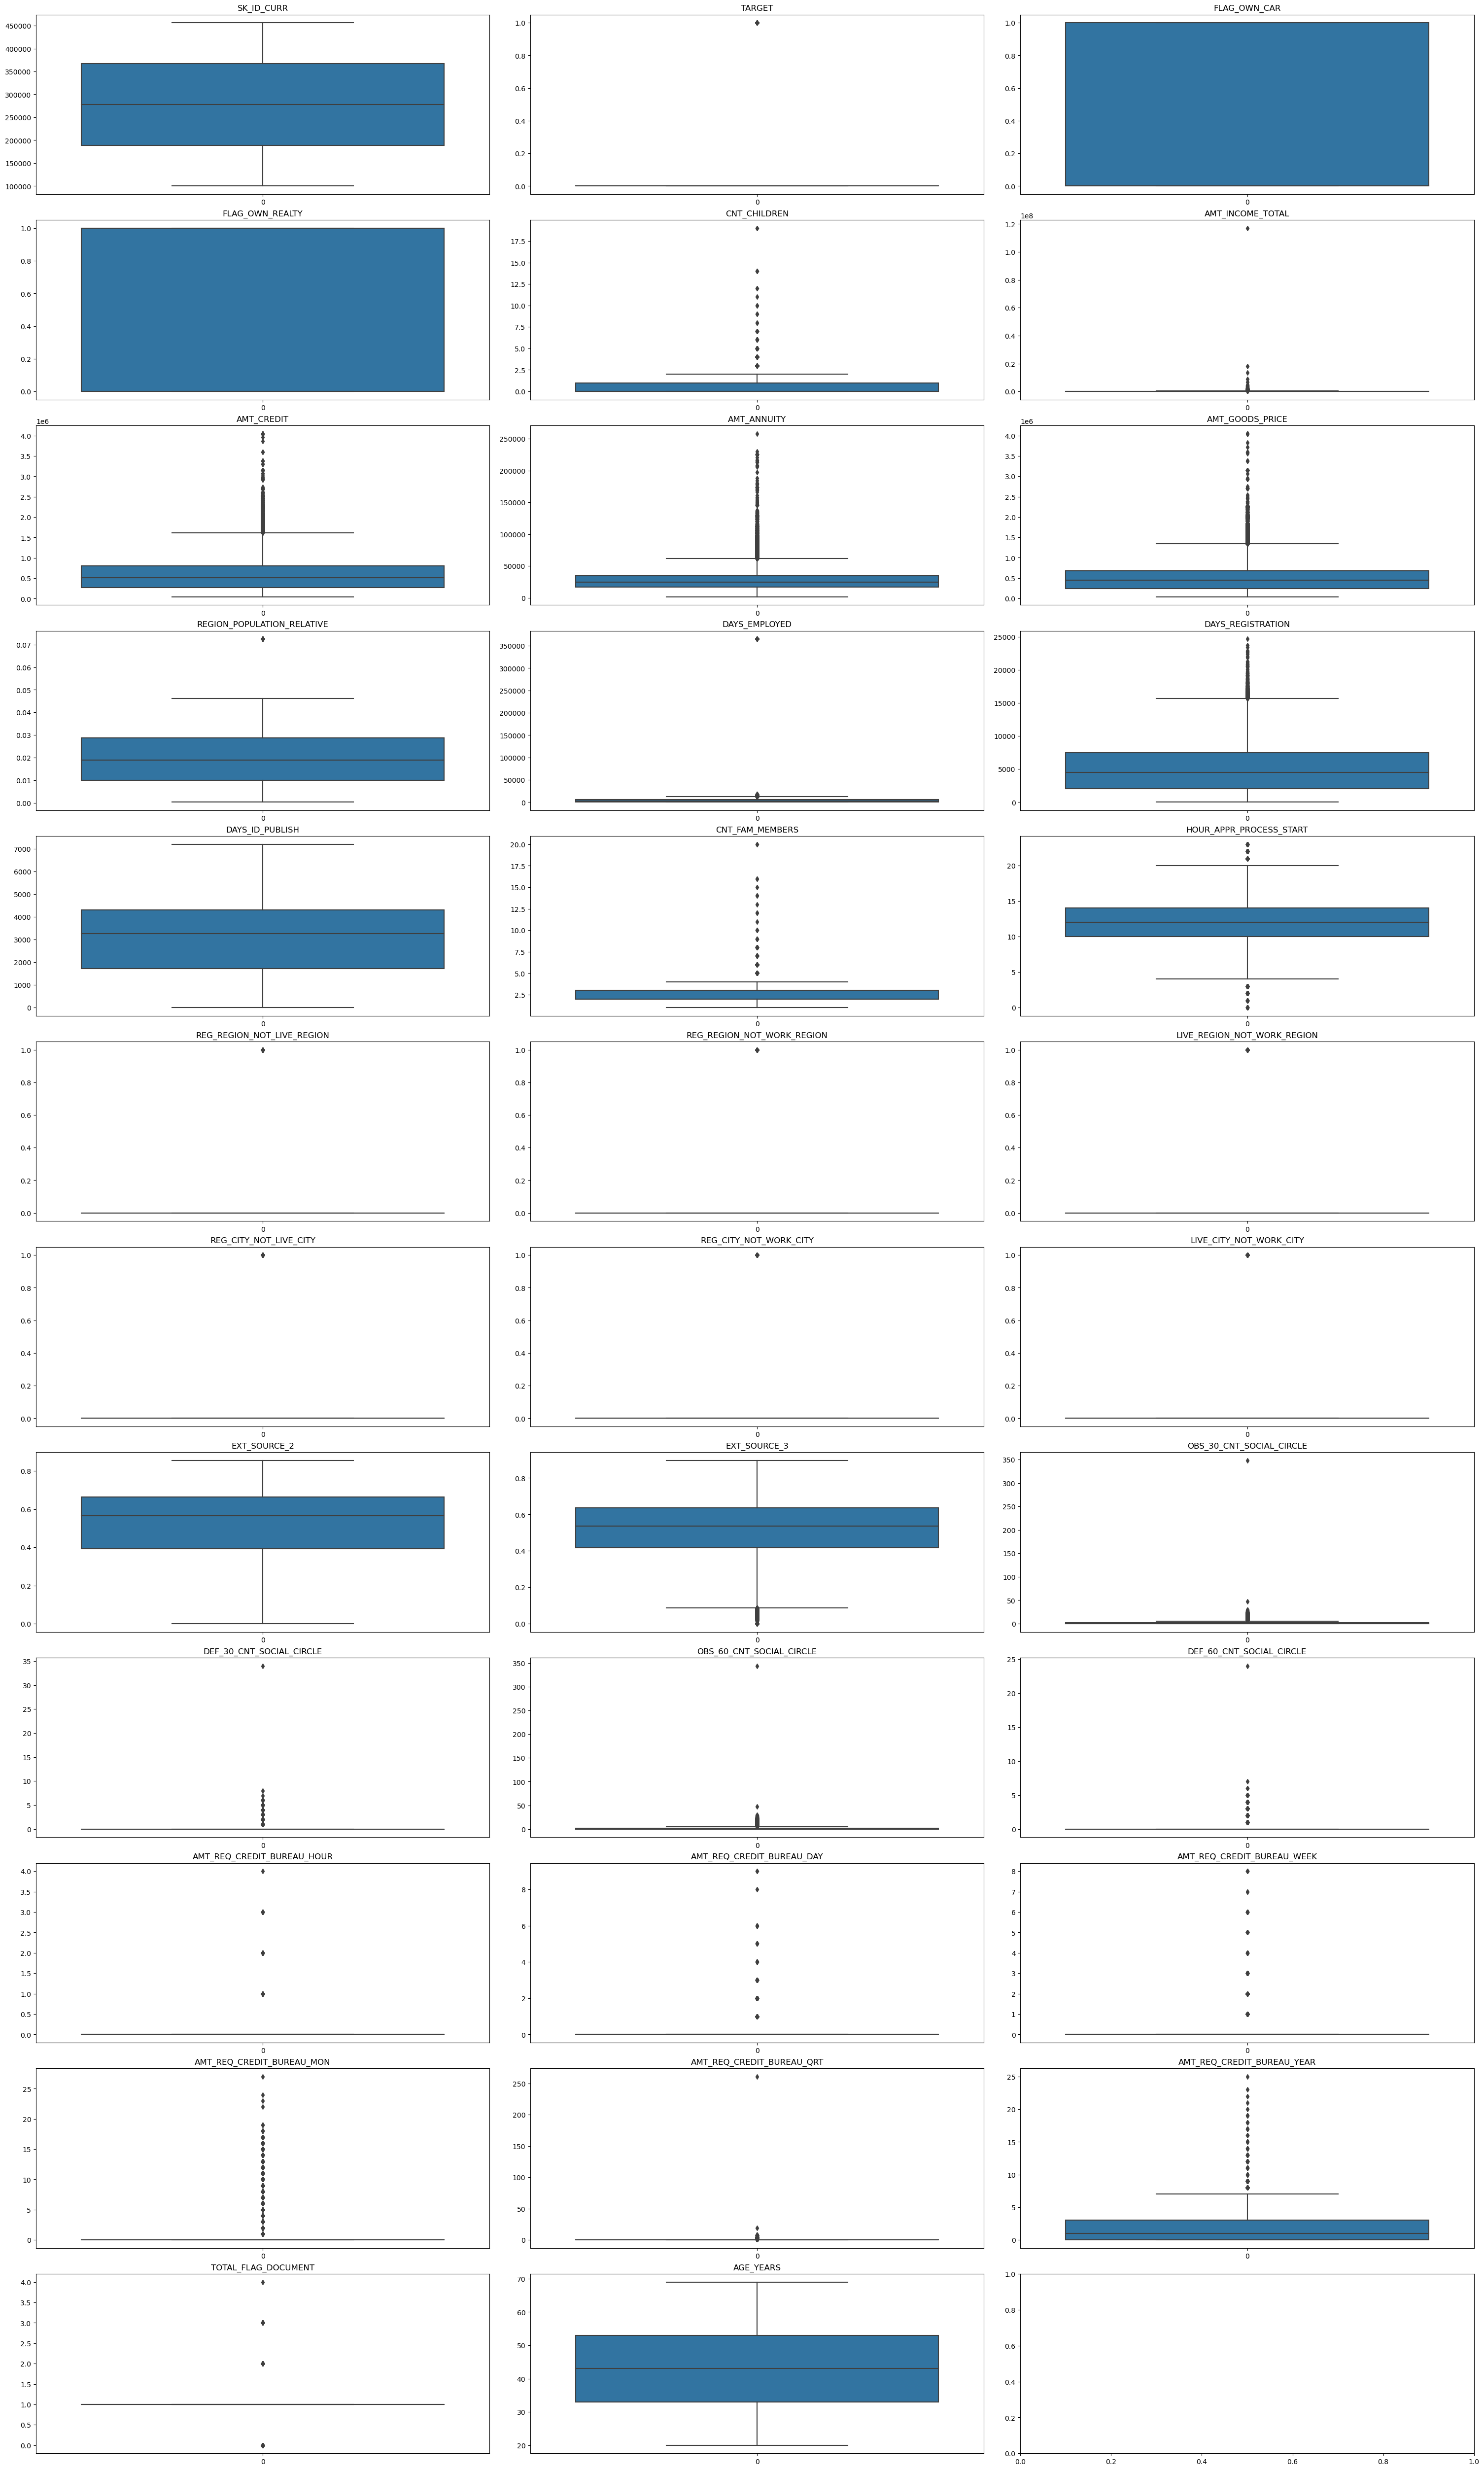

In [83]:
fig,axs= plt.subplots(12,3,constrained_layout = True, figsize = [30,50])
fig.subplots_adjust(top=8, bottom =2, left = 2, right = 3, wspace = 0.06, hspace = 0.5)
for i,cols in zip(axs.flatten(),numeric_cols):
    sns.boxplot(inp0[cols], ax = i)
    i.set_title(cols)
plt.show()

**Highlights:**

FLAG_OWN_CAR:  tells whether the client owns car or not. It has been answered in Y and N which has been further replaced by Y=1 and N =0.Therefore the Q1 ana Q3 is from 0 and 1 respectively.

Similarly, FLAG_OWN_CAR  tells whether the client owns house or not. It has been answered in Y and N which has been further replaced by Y=1 and N =0.Therefore the Q1 ana Q3 is from 0 and 1 respectively.

CNT_CHILDREN: The above whiskers lies at 2.5. Q1 and Q3 lies somewhere between 0 and 1.5. We can see outliers after the maximum whiskers.The outliers is as high as 17.5.

AMT_INCOME_TOTAL: A thin line can be seen that lies somewhere around 0, outliers can be seen here.

AMT_CREDIT: 3rd quartile is greater than the first quartile which means most of the values lies in the third quartile, having the large numbers of quartiles.

AMT_ANNUITY: 3rd quartile is greater than the first quartile which means most of the values lies in the third quartile. 

AMT_GOODS_PRICE: It has too many outliers to notice.

REGION_POPULATION_RELATIVE: Most of the data lies between Q1 and Q2 and very less outliers. 

DAYS_EMPLOYED: Only a  thin line can be seen.

DAYS_REGISTRATION: Median lies somewhere at 5000. Outliers are above 25000.

DAYS_ID_PUBLISH: 3rd quartile is smaller than the first quartile which means most of the values lies in the first quartile.

HOUR_APPR_PROCESS_START: Outliers are above and below maximum and minimum whiskers respectively.

EXT_SOURCE_2: Q1 is greater than Q3.

EXT_SOURCE_3: Below minimum whiskers outliers are there.

All the LIVE_REGION_NOT_WORK_REGION, REG_REGION_NOT_WORK_REGION, REG_REGION_NOT_LIVE_REGION, LIVE_REGION_NOT_WORK_CITY etc. these have just a single thin line.

AGE_YEARS: It can be seen that the client between age group 35 to 55 has applied for the loan mostly. Average people are mostly 45 years old.

TOTAL_FLAG_DOCUMENT: The maximum document submitted were 4 and the minimum documents were 0 as well.





**Univariate Analysis**

In [84]:
inp0["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

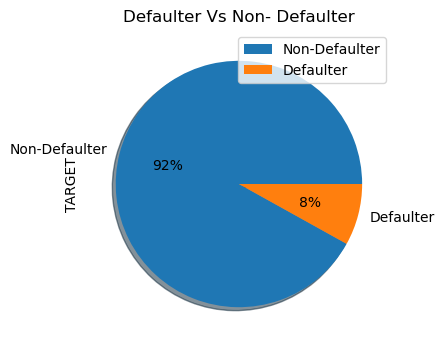

In [85]:
#Using Target go check the defaulter and non- defaulters.
inp0["TARGET"].value_counts().plot(kind = 'pie', autopct = "%.0f%%", labels = (["Non-Defaulter","Defaulter"]), shadow = True, figsize = [4,4])
plt.title("Defaulter Vs Non- Defaulter")
plt.legend(loc=1)
plt.show()

Now let us divide the data set into two dataframes on the basis of target( 1 = Client with payment difficulties  and  0 = all other cases) to make analysis on the basis of defaulters and non- defaulters.

In [86]:
non_def_0 = inp0[inp0["TARGET"]==0]
def_1 = inp0[inp0["TARGET"]==1]

In [87]:
non_def_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   
5      100008       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   
5                1             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                    0.003541           1188               1186   
2                    0.010032            225               4260   
3                    0.008019           3039               9833   
4                    0.028663           3038               4311   
5                    0.035792           1588               4970   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1              291      Core staff              2.0   
2             2531        Laborers              1.0   
3             2437        Laborers              2.0   
4             3458      Core staff              1.0   
5              477        Laborers              2.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   
5                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  \
1                       0                        0            School   
2                       0                        0        Government   
3                       0                        0          Business   
4                       1                        1          Religion   
5                       0                        0             Other   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
1      0.622246      0

**Contract Type Analysis**

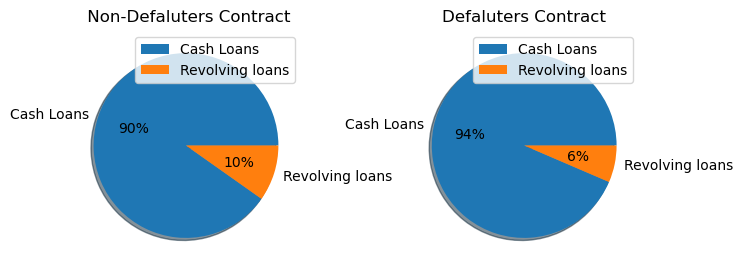

In [88]:
fig,axs = plt.subplots(1,2,figsize = (8,3))
#Plot for non-defaulters contract type
axs[0].pie(x = non_def_0["NAME_CONTRACT_TYPE"].value_counts() ,autopct = "%.0f%%", labels = (["Cash Loans","Revolving loans"]), shadow = True)
axs[0].set_title(" Non-Defaluters Contract")
axs[0].legend(loc=1)

#Plot for Defaulters contract type
axs[1].pie(x = def_1["NAME_CONTRACT_TYPE"].value_counts() ,autopct = "%.0f%%", labels = (["Cash Loans","Revolving loans"]), shadow = True)
axs[1].set_title("Defaluters Contract")
axs[1].legend(loc=1)


plt.show()

Insights: In both the cases, the contract type is mostly the cash loans. Only few clients have opted for the revolving loans.

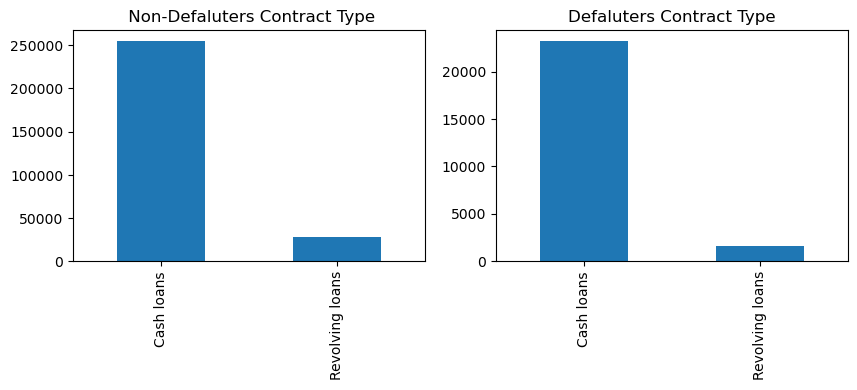

In [89]:
fig,axs = plt.subplots(1,2,figsize = (10,3))
#Plot for non-defaulters contract
non_def_0["NAME_CONTRACT_TYPE"].value_counts().plot(kind = 'bar', ax = axs[0])
axs[0].set_title(" Non-Defaluters Contract Type")


#Plot for Defaulters contract
def_1["NAME_CONTRACT_TYPE"].value_counts().plot(kind = "bar", ax = axs[1])
axs[1].set_title("Defaluters Contract Type")



plt.show()

**Analysis on the basis of Gender**

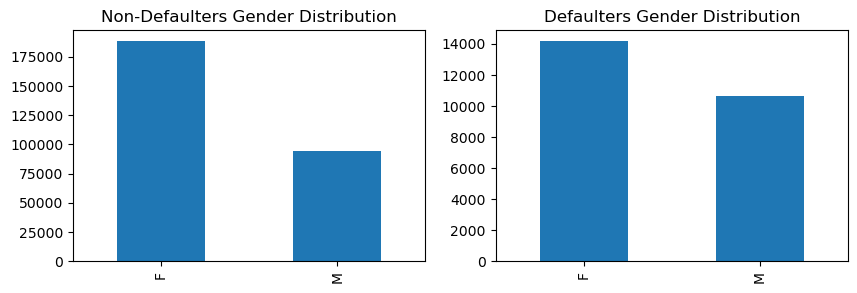

In [90]:
fig,axs = plt.subplots(1,2,figsize = (10,3))
#Plot for non-defaulters Gender
non_def_0["CODE_GENDER"].value_counts().plot(kind = 'bar', ax = axs[0])
axs[0].set_title("Non-Defaulters Gender Distribution")


#Plot for Defaulters Gender
def_1["CODE_GENDER"].value_counts().plot(kind = "bar", ax = axs[1])
axs[1].set_title("Defaulters Gender Distribution")



plt.show()

**Insights:** In both the cases, Female client is more than the male clients. 


**Univariate Analysis for Categorical columns**

Now,let us do Univariate analysis of all the columns and let us check what insights can be made.

In [91]:
#Exttracting all the numeric columns
numeric_cols_non = non_def_0.select_dtypes(include = "object").columns
numeric_cols

Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'TOTAL_FLAG_DOCUMENT', 'AGE_YEARS'],
      dtype='object')

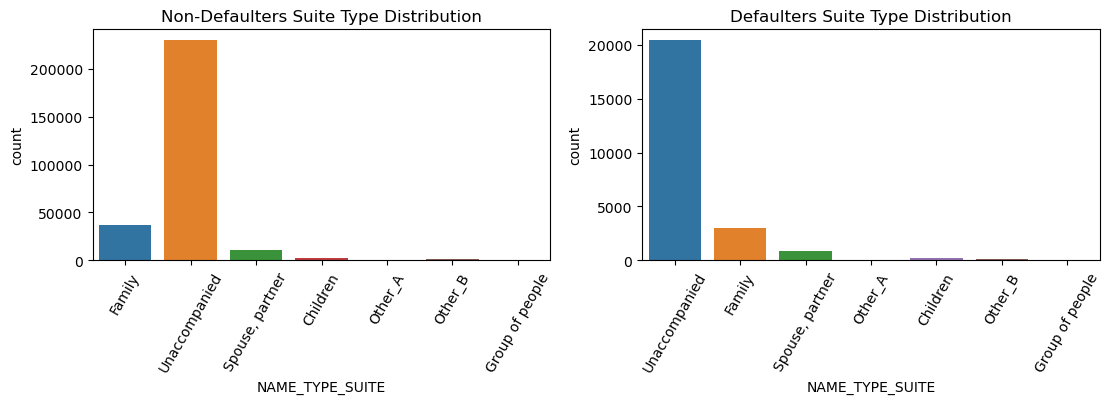

In [92]:
fig,axs = plt.subplots(1,2,figsize = (13,3))
#Plot for non-defaulters suit type
sns.countplot(data = non_def_0, x = "NAME_TYPE_SUITE", ax = axs[0])
axs[0].set_title("Non-Defaulters Suite Type Distribution")
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation = 60)  #rotate the labels to 60 degrees

#Plot for Defaulters suit type
sns.countplot(data = def_1, x = "NAME_TYPE_SUITE", ax = axs[1])
axs[1].set_title("Defaulters Suite Type Distribution")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation = 60)  #rotate the labels to 60 degrees


plt.show()

**Insights:** In both the cases, mostly the client was unaccompanied then followed by family, followed by partner and so on. So we can’t actually say whether the client being defaulter or non-defaulter does really depend upon the person accompanying him/her.


**NAME_INCOME_TYPE**

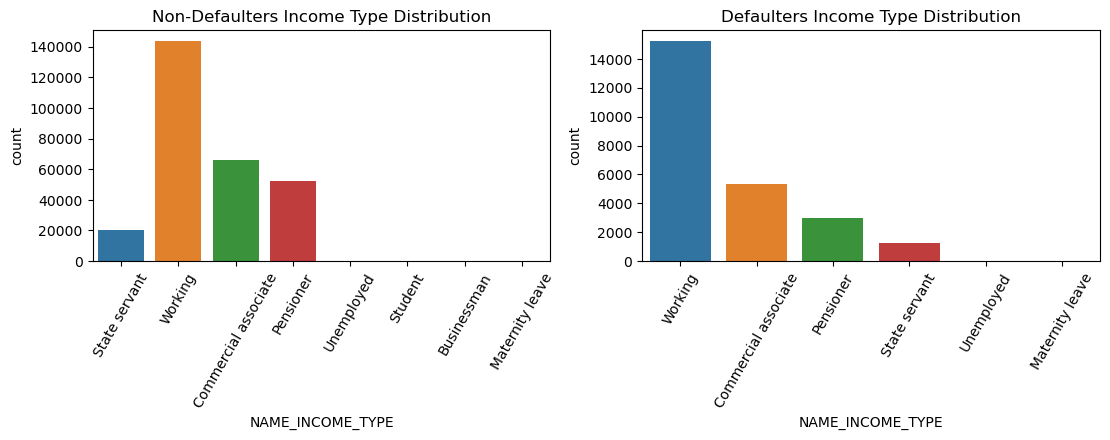

In [93]:
fig,axs = plt.subplots(1,2,figsize = (13,3))
#Plot for non-defaulters Income type
sns.countplot(data = non_def_0, x = "NAME_INCOME_TYPE", ax = axs[0])
axs[0].set_title("Non-Defaulters Income Type Distribution")
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation = 60)  #rotate the labels to 60 degrees

#Plot for Defaulters Income type
sns.countplot(data = def_1, x = "NAME_INCOME_TYPE", ax = axs[1])
axs[1].set_title("Defaulters Income Type Distribution")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation = 60)  #rotate the labels to 60 degrees


plt.show()

**Insights:** 
In both the cases, large number of client belongs to working income type.

The interesting point to note here that is businessman client are very few. 

None of the businessman is in the defaulters list.

If students have applied for the loan then they are able to pay the loan as they must be supported by their family.(it is just the assumption)


**Education Type Distribution**

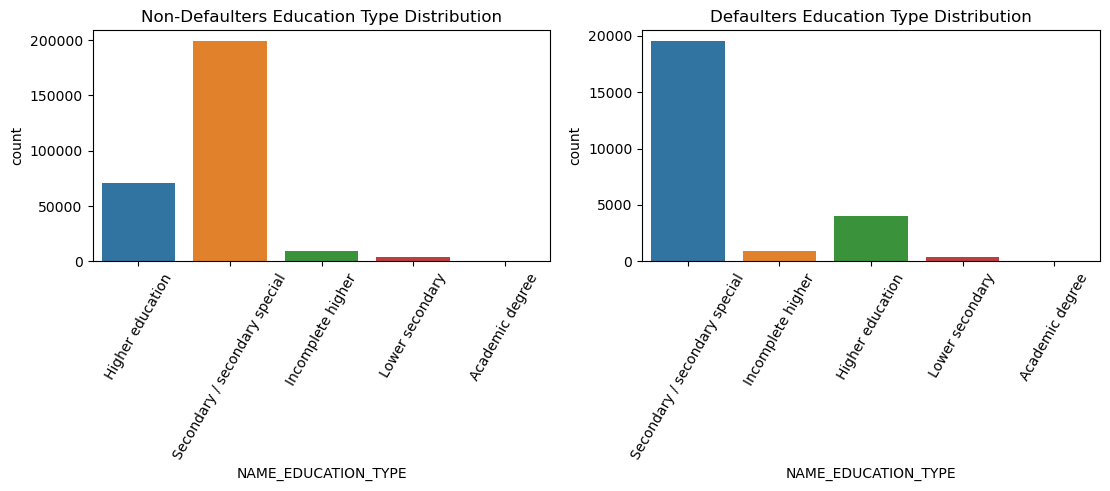

In [94]:
fig,axs = plt.subplots(1,2,figsize = (13,3))
#Plot for non-defaulters Education type
sns.countplot(data = non_def_0, x = "NAME_EDUCATION_TYPE", ax = axs[0])
axs[0].set_title("Non-Defaulters Education Type Distribution")
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation = 60)  #rotate the labels to 60 degrees

#Plot for Defaulters  Education type
sns.countplot(data = def_1, x = "NAME_EDUCATION_TYPE", ax = axs[1])
axs[1].set_title("Defaulters Education Type Distribution")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation = 60)  #rotate the labels to 60 degrees


plt.show()

**Insights** In both the cases, the client has secondary special  as highest education level , followed by higher education.

**Family status**

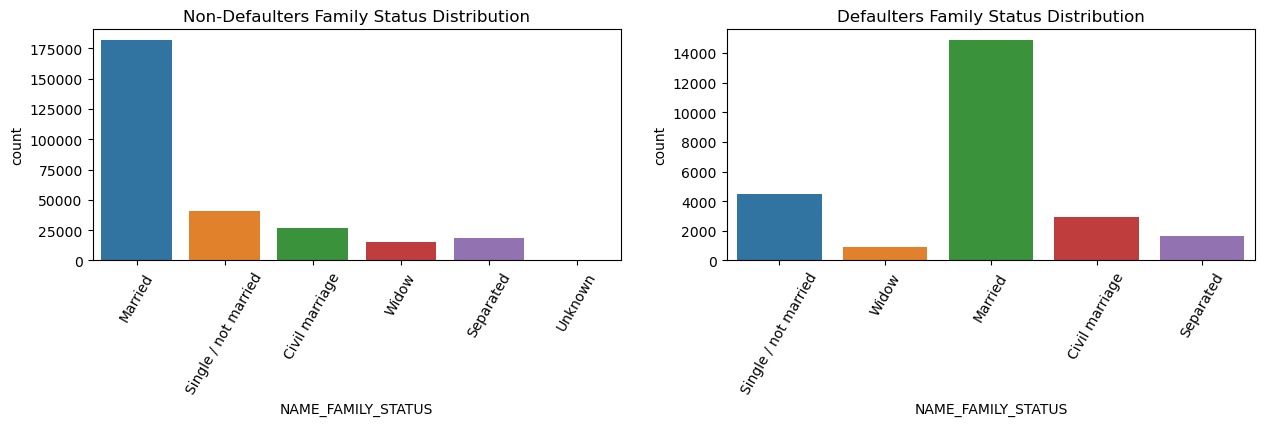

In [95]:
fig,axs = plt.subplots(1,2,figsize = (15,3))
#Plot for non-defaulters family status
sns.countplot(data = non_def_0, x = "NAME_FAMILY_STATUS", ax = axs[0])
axs[0].set_title("Non-Defaulters Family Status Distribution")
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation = 60)  #rotate the labels to 60 degrees

#Plot for Defaulters family status
sns.countplot(data = def_1, x = "NAME_FAMILY_STATUS", ax = axs[1])
axs[1].set_title("Defaulters Family Status Distribution")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation = 60)  #rotate the labels to 60 degrees


plt.show()

**Insights**: In both the cases, the client who have taken loan are mostly married. Then followed by singles. There is a group of people who have not shared their family status. 


**Occupation Type**

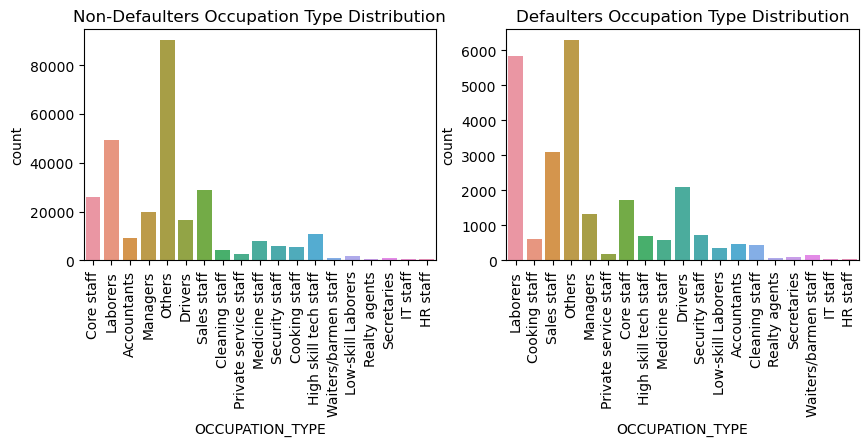

In [96]:
fig,axs = plt.subplots(1,2,figsize = (10,3))
#Plot for non-defaulters "OCCUPATION_TYPE"
sns.countplot(data = non_def_0, x = "OCCUPATION_TYPE", ax = axs[0])
axs[0].set_title("Non-Defaulters Occupation Type Distribution")
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation = 90)  #rotate the labels to 60 degrees

#Plot for Defaulters "OCCUPATION_TYPE"
sns.countplot(data = def_1, x = "OCCUPATION_TYPE", ax = axs[1])
axs[1].set_title("Defaulters Occupation Type Distribution")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation = 90)  #rotate the labels to 60 degrees


plt.show()

**Insights:** 
In both the cases, the client has mostly not shared their occupation type. So we can say that laborers are mostly high in both the cases.


**Organization Type**

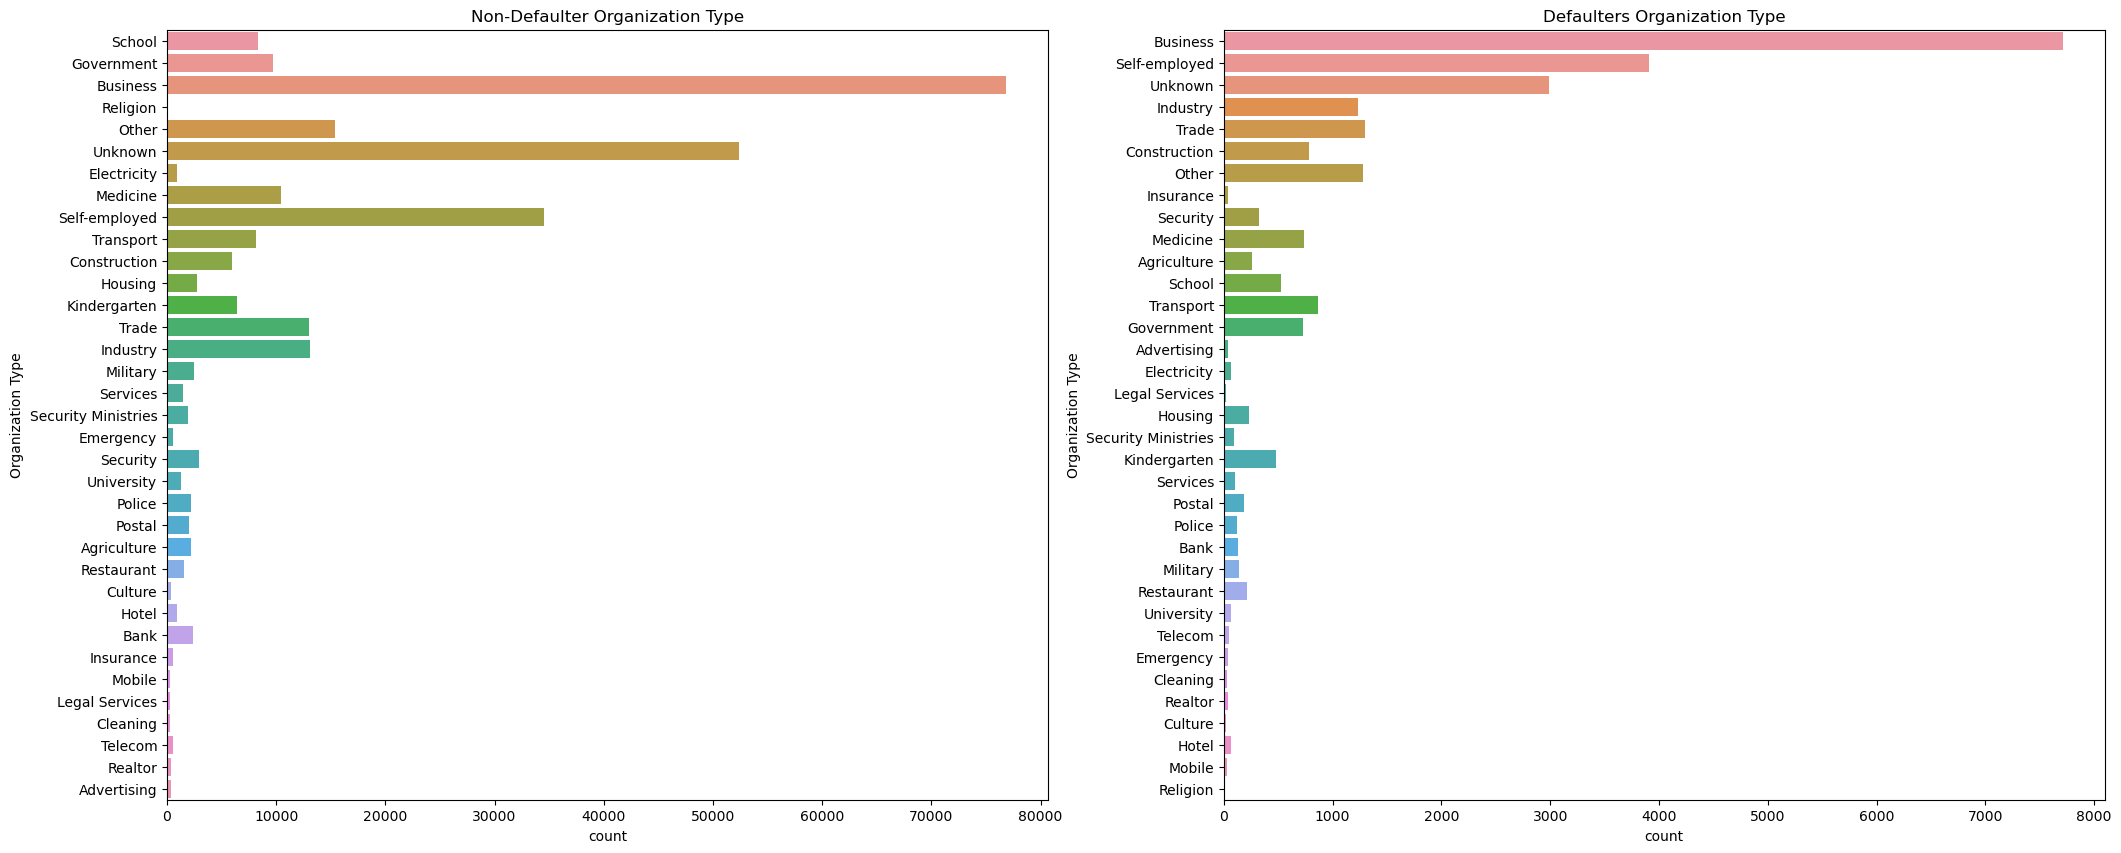

In [97]:
fig , axs = plt.subplots(1,2, figsize = [25,10])
#Plot non defaulters organization type
sns.countplot(data = non_def_0, y = "ORGANIZATION_TYPE", ax = axs[0])
axs[0].set_title("Non-Defaulter Organization Type")
axs[0].set_yticklabels(axs[0].get_yticklabels())
axs[0].set_ylabel("Organization Type")
#Plot defaulters organization type
sns.countplot(data = def_1, y = "ORGANIZATION_TYPE", ax = axs[1])
axs[1].set_title("Defaulters Organization Type")
axs[1].set_yticklabels(axs[1].get_yticklabels())
axs[1].set_ylabel("Organization Type")


plt.show()

**Insights:** 
For Non-Defaulters: Business, self employed, trade, industry and others have applied most for the loans.

For Defaulters: It is from Business, selfemployed, industry, trade, other and transport are the ones have mostly applied for the loans.    

**Income Distribution**

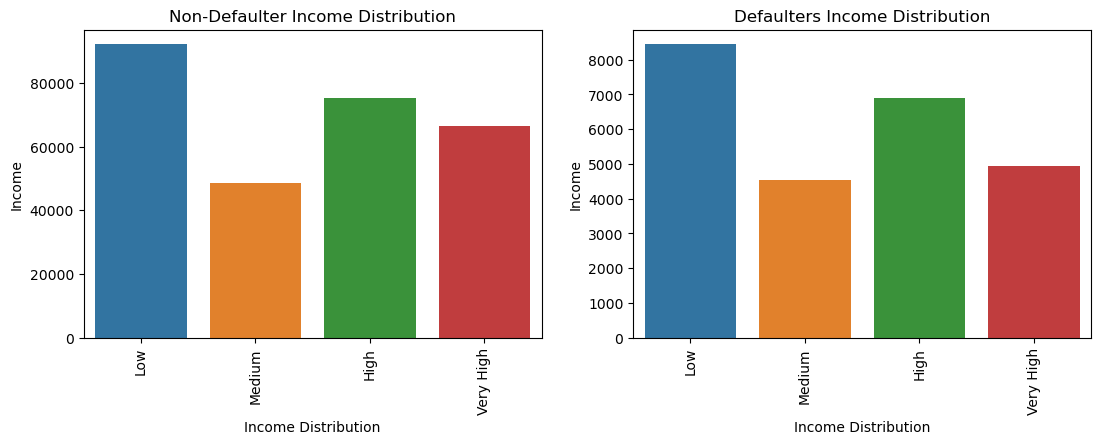

In [98]:
fig , axs = plt.subplots(1,2, figsize = [13,4])
#Plot non defaulters income type
sns.countplot(data = non_def_0, x = "AMT_INCOME_RANGE", ax = axs[0])
axs[0].set_title("Non-Defaulter Income Distribution")
axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation = 90)
axs[0].set_ylabel("Income")
axs[0].set_xlabel("Income Distribution")
#Plot defaulters income type
sns.countplot(data = def_1, x = "AMT_INCOME_RANGE", ax = axs[1])
axs[1].set_title("Defaulters Income Distribution")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation = 90)

axs[1].set_ylabel("Income")
axs[1].set_xlabel("Income Distribution")

plt.show()

**Insights:** For both non-defaulters and defaulters, the income of the client is mostly low. A good number of high income people have also opted for loan. 


In [99]:
non_def_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   
5      100008       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   
5                1             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                    0.003541           1188               1186   
2                    0.010032            225               4260   
3                    0.008019           3039               9833   
4                    0.028663           3038               4311   
5                    0.035792           1588               4970   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1              291      Core staff              2.0   
2             2531        Laborers              1.0   
3             2437        Laborers              2.0   
4             3458      Core staff              1.0   
5              477        Laborers              2.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   
5                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  \
1                       0                        0            School   
2                       0                        0        Government   
3                       0                        0          Business   
4                       1                        1          Religion   
5                       0                        0             Other   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
1      0.622246      0

**Correlation between numerical Variables**

In [150]:
#For non - defaulters
corr_non_def = non_def_0.iloc[0:, 2:]   
#For defaulters
corr_def = def_1.iloc[0:, 2:]

non_def = corr_non_def.corr()
defaulter_1 = corr_def.corr()

def corr_for_target(data, title):
    plt.figure(figsize = [20,15])
    ax = sns.heatmap(data, cmap = "YlGnBu")

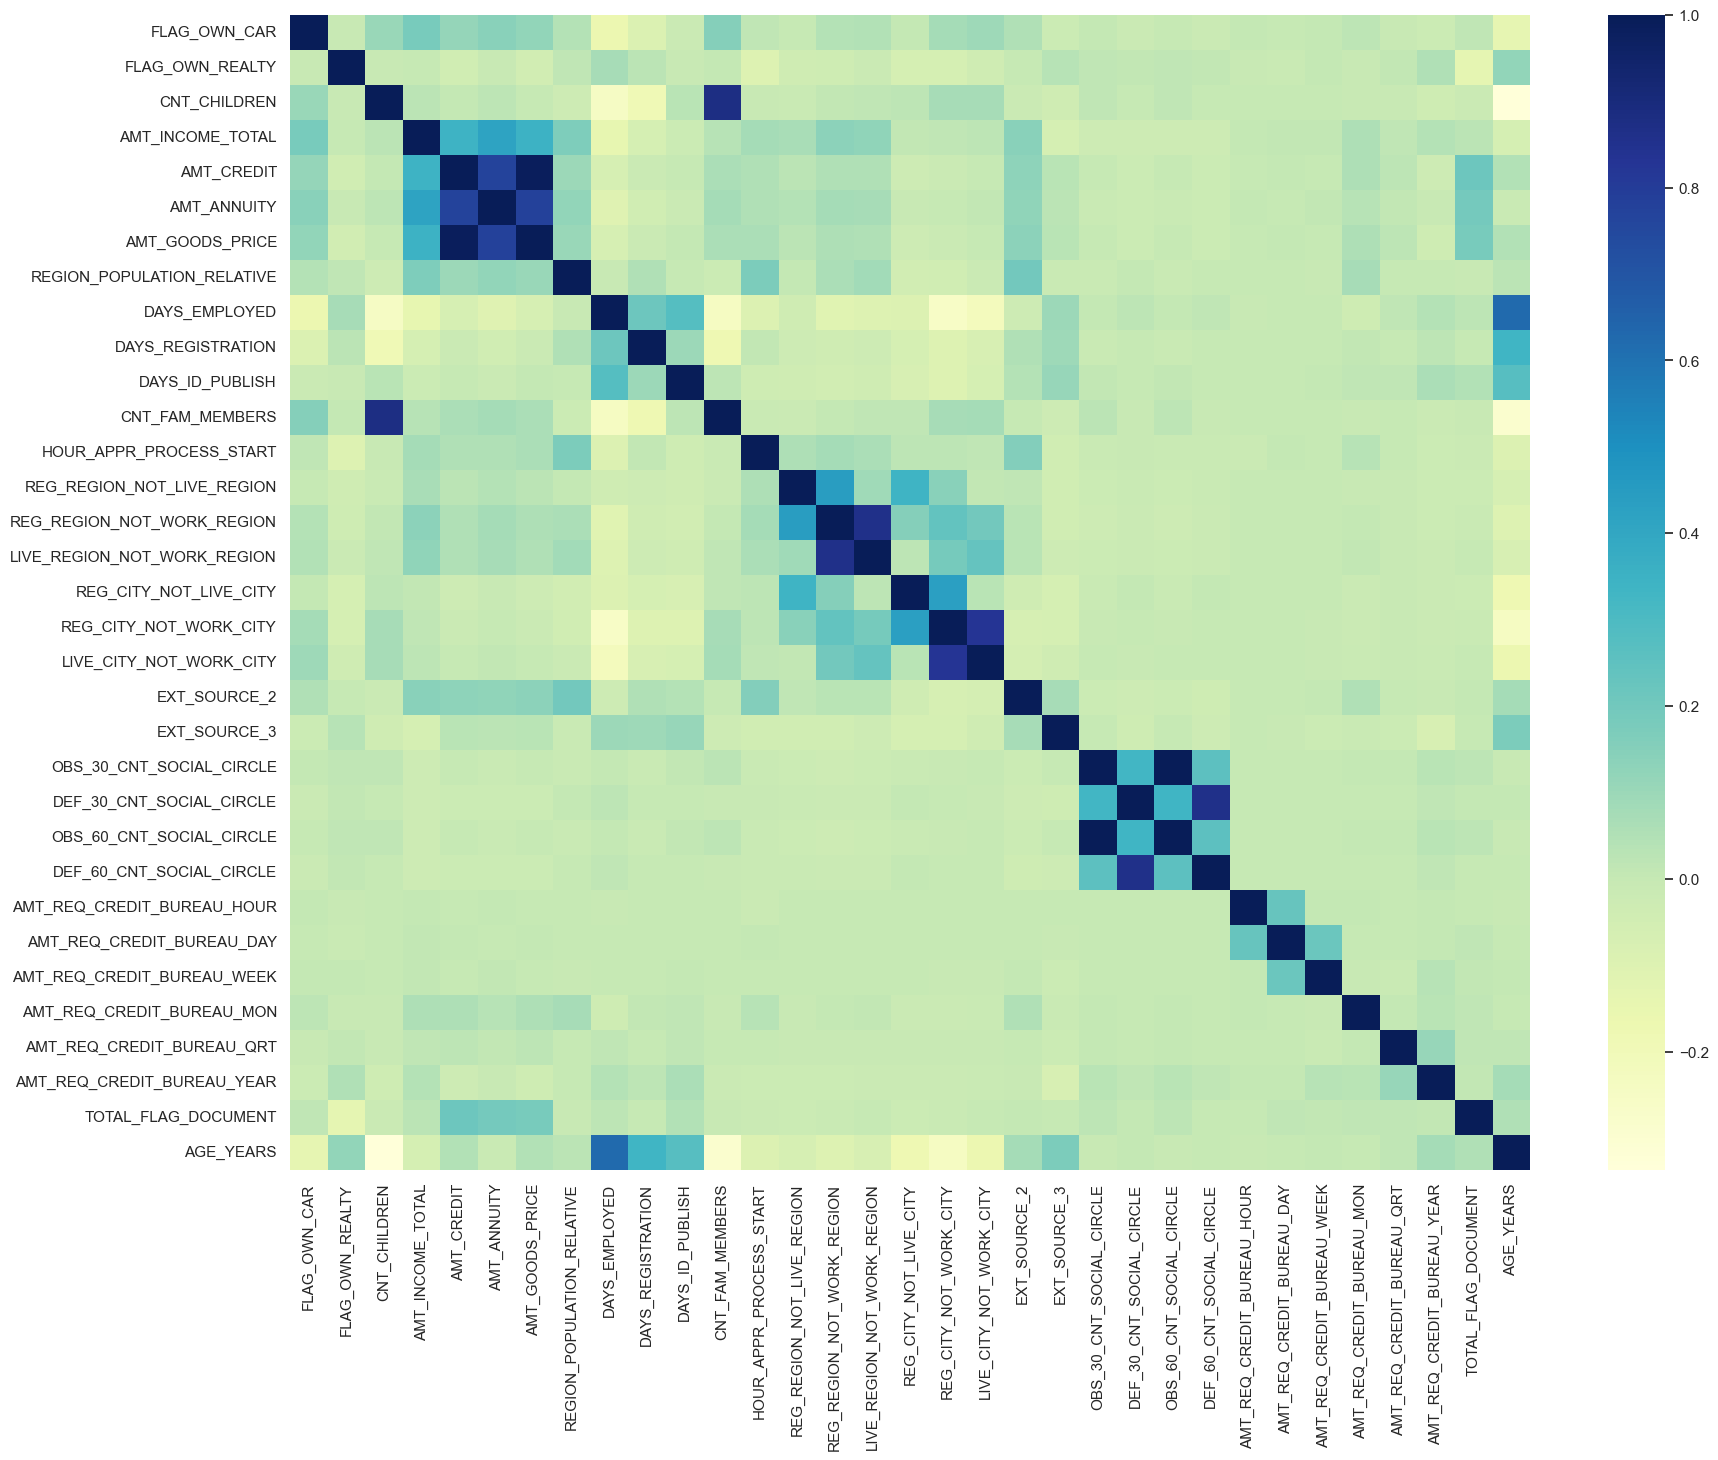

In [151]:
corr_for_target(data = non_def, title = "Correlation for non defaulters")

**Insights:**
Clients belonging to high age group have low amount credit.

Children count is directly proportional to family members count.

AMT_ANNUITY is highly proportional to AMT_INCOME_TOTAL

DAYS_EMPLOYED is less common with AMT_INCOME_TOTAL.

 AMT_INCOME_TOTAL is proportional to REGION_POPULATION_RELATIVE.
 
TOTAL_FLAG_DOCUMENT is proportional with high credit amount and annuity amount.


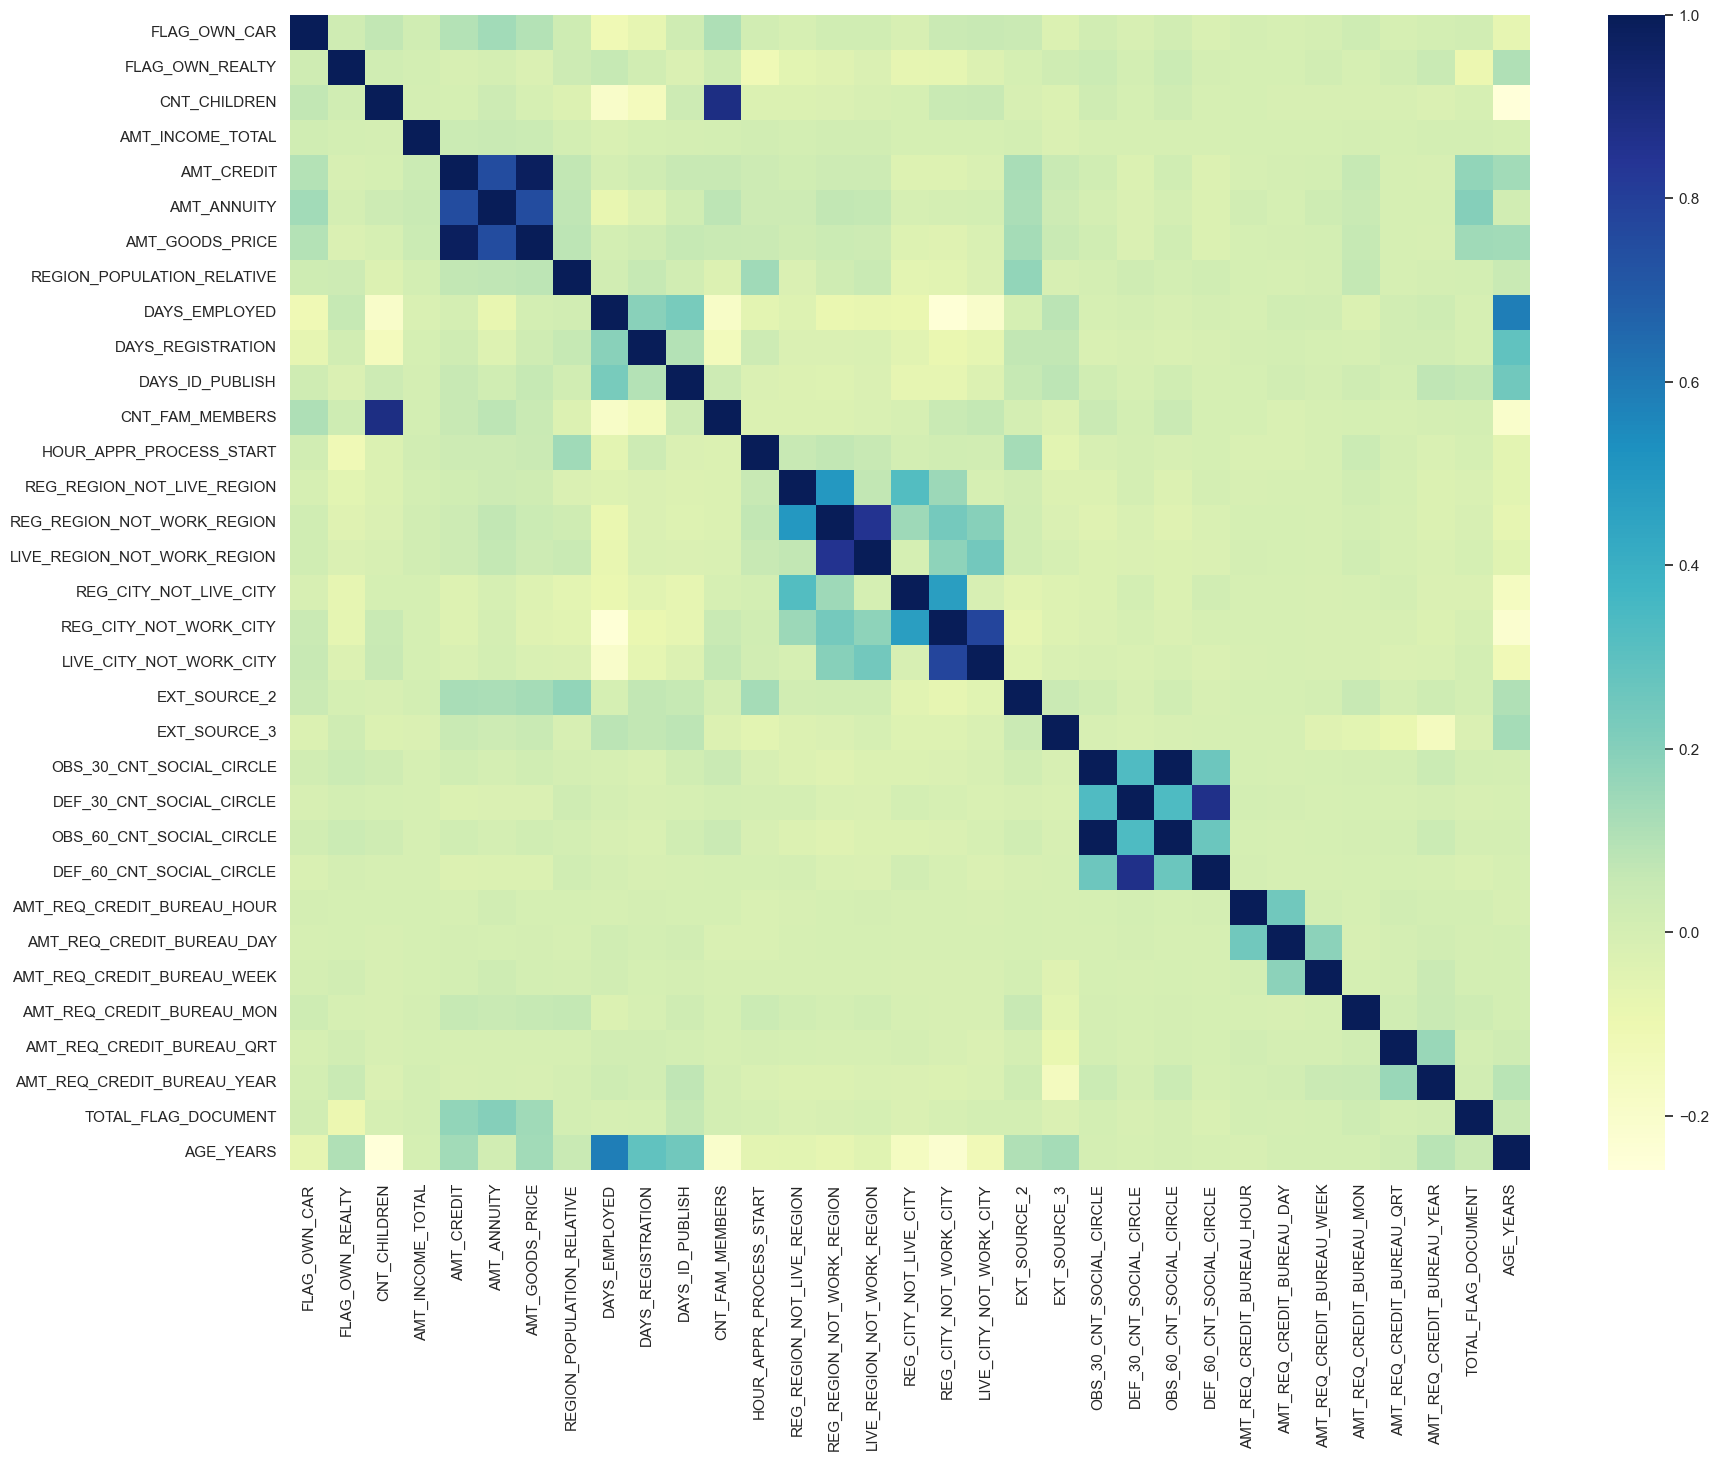

In [146]:
corr_for_target(data = defaulter_1, title = "Correlation for defaulters")

Insights for both the non-defaulters and defaulters are almost same.

**Univariate Analysis for numerical columns**

Since we are going to create univariate analysis for many numerical column so it's better to define a function for further usage.

In [103]:
def univariate(column):
    fig,axs = plt.subplots(1,2, figsize = [13,4])
    sns.set(style = "darkgrid")
    #Plot non defaulters
    sns.distplot(non_def_0[column], color = "g",ax = axs[0])
    axs[0].set_title("Non-Defaulter")
    axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation = 90)
    axs[0].set_ylabel("Non-Defaulters")
    #Plot defaulters
    sns.distplot(def_1[column], color = "b",ax = axs[1])
    axs[1].set_title("Defaulter")
    axs[1].set_xticklabels(axs[1].get_xticklabels(),rotation = 90)
    axs[1].set_ylabel("Defaulters")


plt.show()
    

**AMT_ANNUITY**

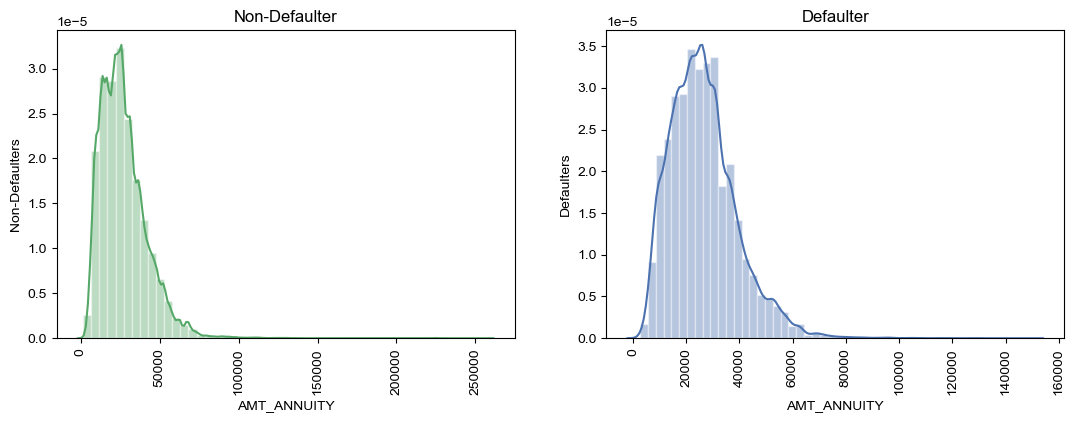

In [104]:
univariate("AMT_ANNUITY")

**Insights:**

For non-defaulters, most loan annuity ranges between 0 to 75000.
For defaulters, its ranges between 0 to 60000.


**AMT_GOODS_PRICE Column**

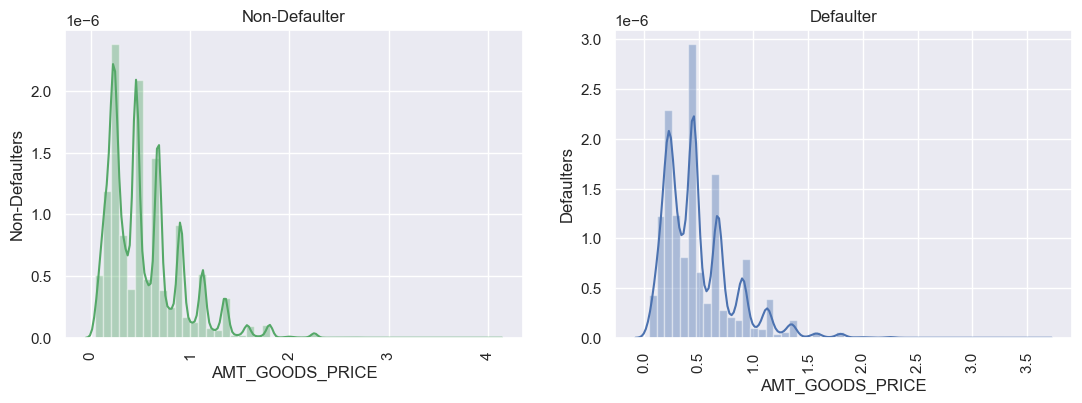

In [105]:
univariate("AMT_GOODS_PRICE")

**Insights:**
Both non-defaulters and defaulters have similar shape.

**REGION_POPULATION_RELATIVE**

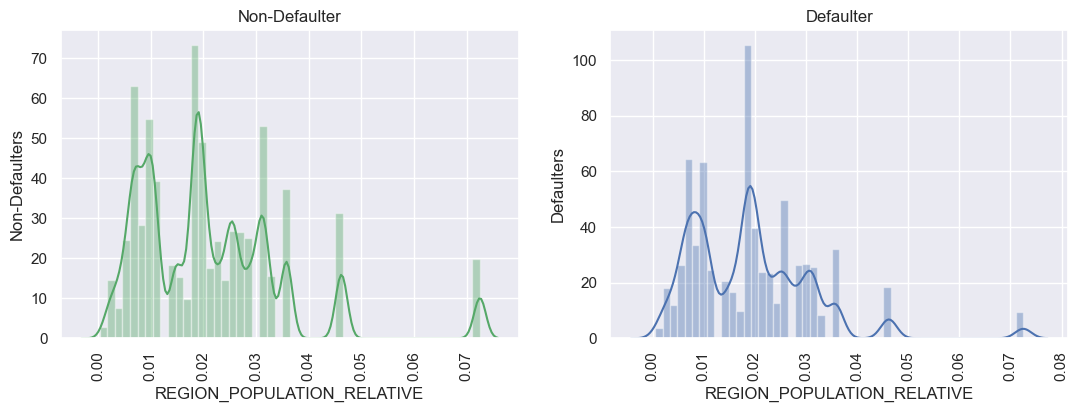

In [106]:
univariate("REGION_POPULATION_RELATIVE")

**Insights:**
Both non-defaulters and defaulters distribution is not normal.
 


**DAYS_ID_PUBLISH**

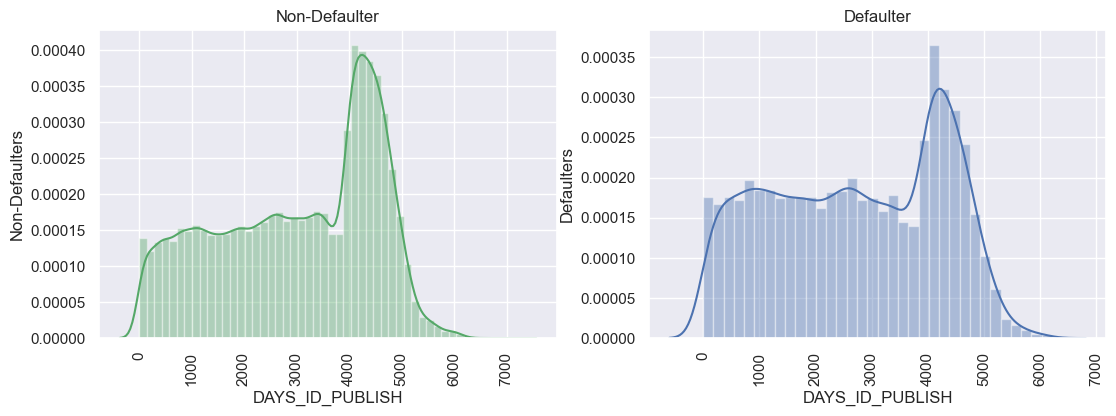

In [107]:
univariate("DAYS_ID_PUBLISH")

**Insights:**
Both non-defaulters and defaulters have similar shape.

**HOUR_APPR_PROCESS_START**

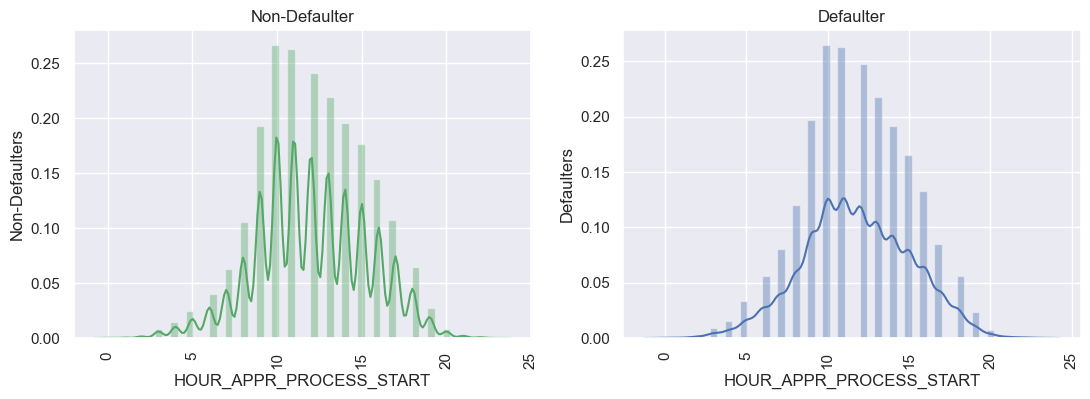

In [108]:
univariate("HOUR_APPR_PROCESS_START")

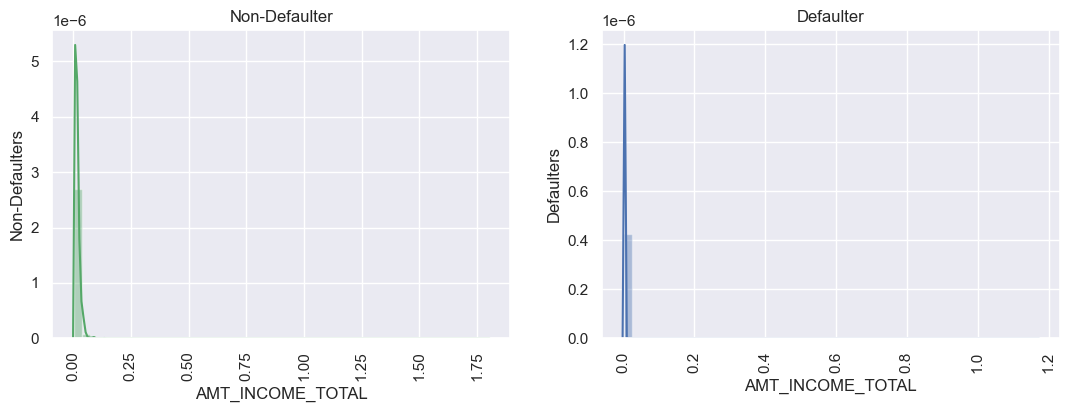

In [109]:
univariate("AMT_INCOME_TOTAL")

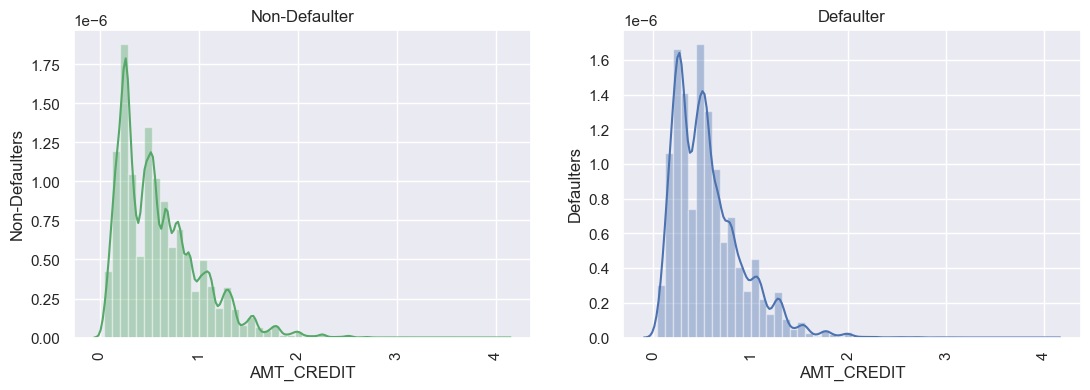

In [110]:
univariate("AMT_CREDIT")

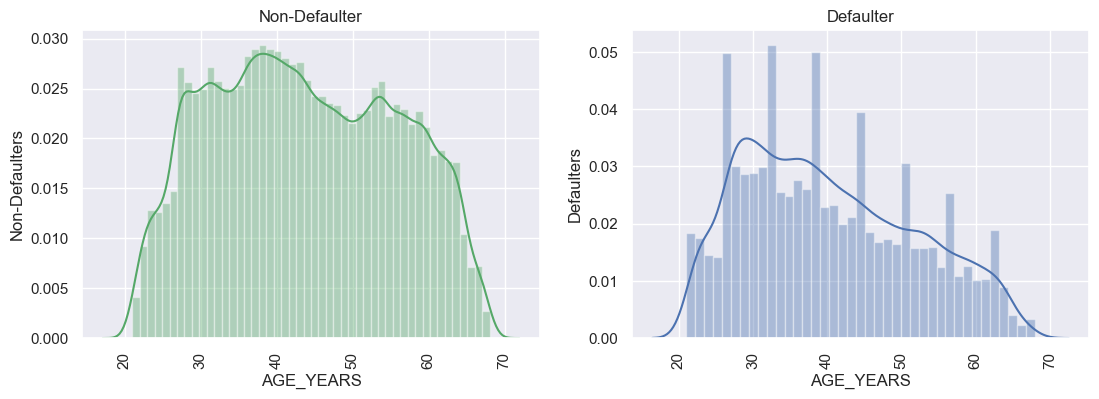

In [111]:
univariate("AGE_YEARS")

 **Bivariate Analysis:Numerical and Categorical columns**
 

In [112]:
inp0.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801            637               3648   
1                    0.003541           1188               1186   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             2120        Laborers              1.0   
1              291      Core staff              2.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  \
0                       0                        0          Business   
1                       0                        0            School   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                         2   
1      0.622246      0.535276                         1   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                         2                         2   
1                         0                         1   

   DEF_60_CNT_SOCIAL_CIRCLE  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                         2                           0   
1                         0                           0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                          0                           0   
1                          0                           0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                          0                          0   
1                          0                          0   

   AMT_REQ_CREDIT_BUREAU_YEAR  TOTAL_FLAG_DOCUMENT  AGE_YEARS  \
0                           1                    1         25   
1                           0                    1         45   

  AMT_INCOME_RANGE AMT_CREDIT_RANGE  
0             High           Medium  
1        Very High        Very High

In [113]:
def bivariate(column1, column2):
    fig,axs = plt.subplots(1,2, figsize = [13,4])
    plt.style.use('ggplot')
    sns.despine
    #Plot non defaulters
    sns.scatterplot(x = column1, y = column2,data = non_def_0 ,ax = axs[0])
    axs[0].set_title(f'{column1} vs {column2} for Non-Defaulter', fontsize = 10)
    axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation = 90)
    axs[0].set_ylabel(column2)
    axs[0].set_xlabel(column1)                 
                     
    #Plot defaulters
    sns.scatterplot(x = column1, y = column2,data = def_1 ,ax = axs[1])
    axs[1].set_title(f'{column1} vs {column2} for Defaulter', fontsize = 10)
    axs[1].set_xticklabels(axs[1].get_xticklabels(),rotation = 90)
    axs[1].set_ylabel(column2)
    axs[1].set_xlabel(column1)                 
                     
plt.show()

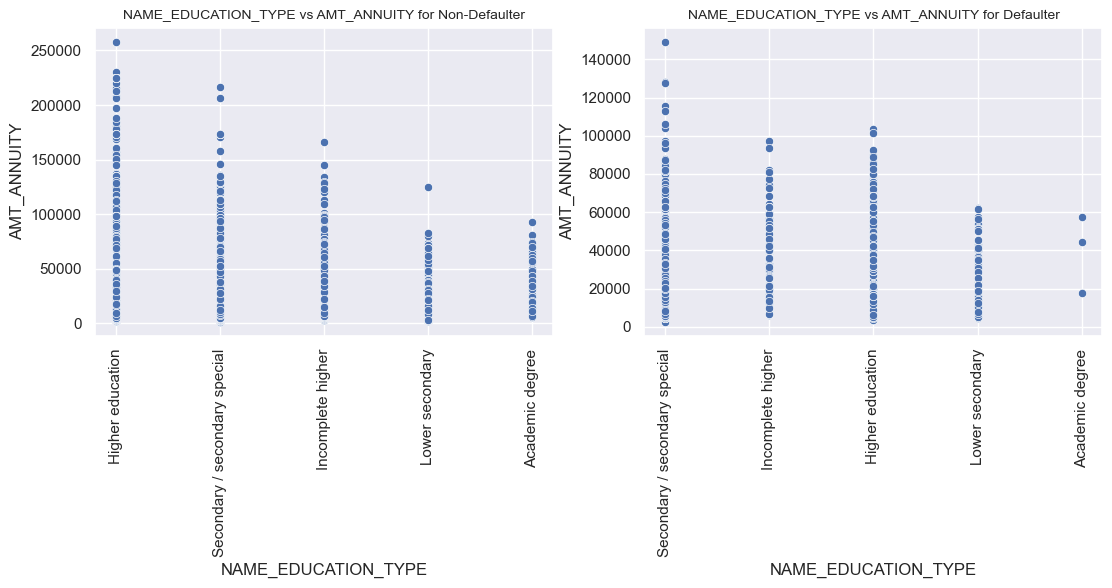

In [114]:
#Analysis between Education type and Amount Annuity
bivariate("NAME_EDUCATION_TYPE","AMT_ANNUITY")

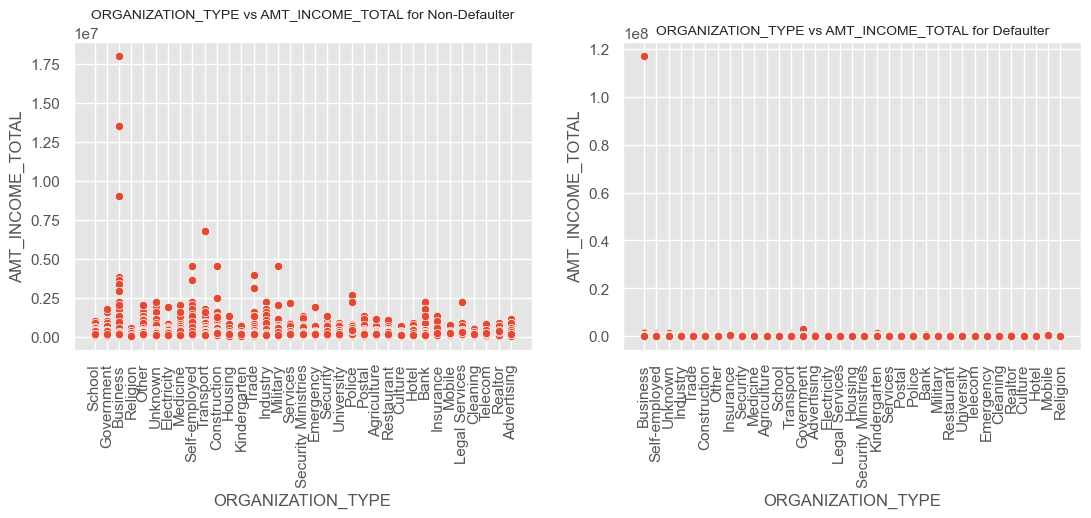

In [115]:
# ORGANIZATION_TYPE vs AMT_INCOME_TOTAL
bivariate("ORGANIZATION_TYPE","AMT_INCOME_TOTAL")

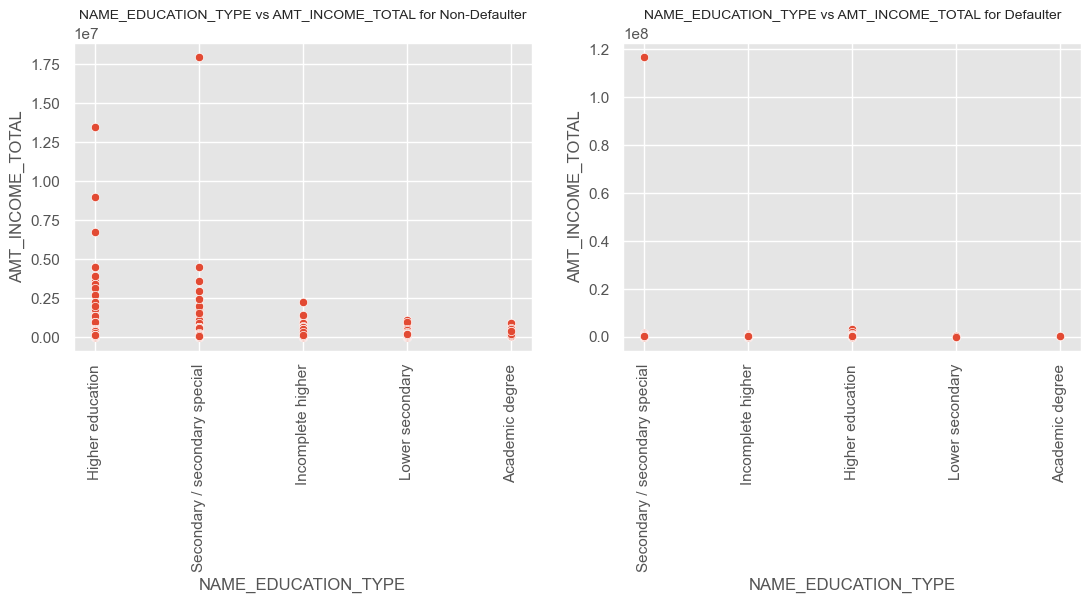

In [116]:
bivariate("NAME_EDUCATION_TYPE","AMT_INCOME_TOTAL")

**Pairplot**

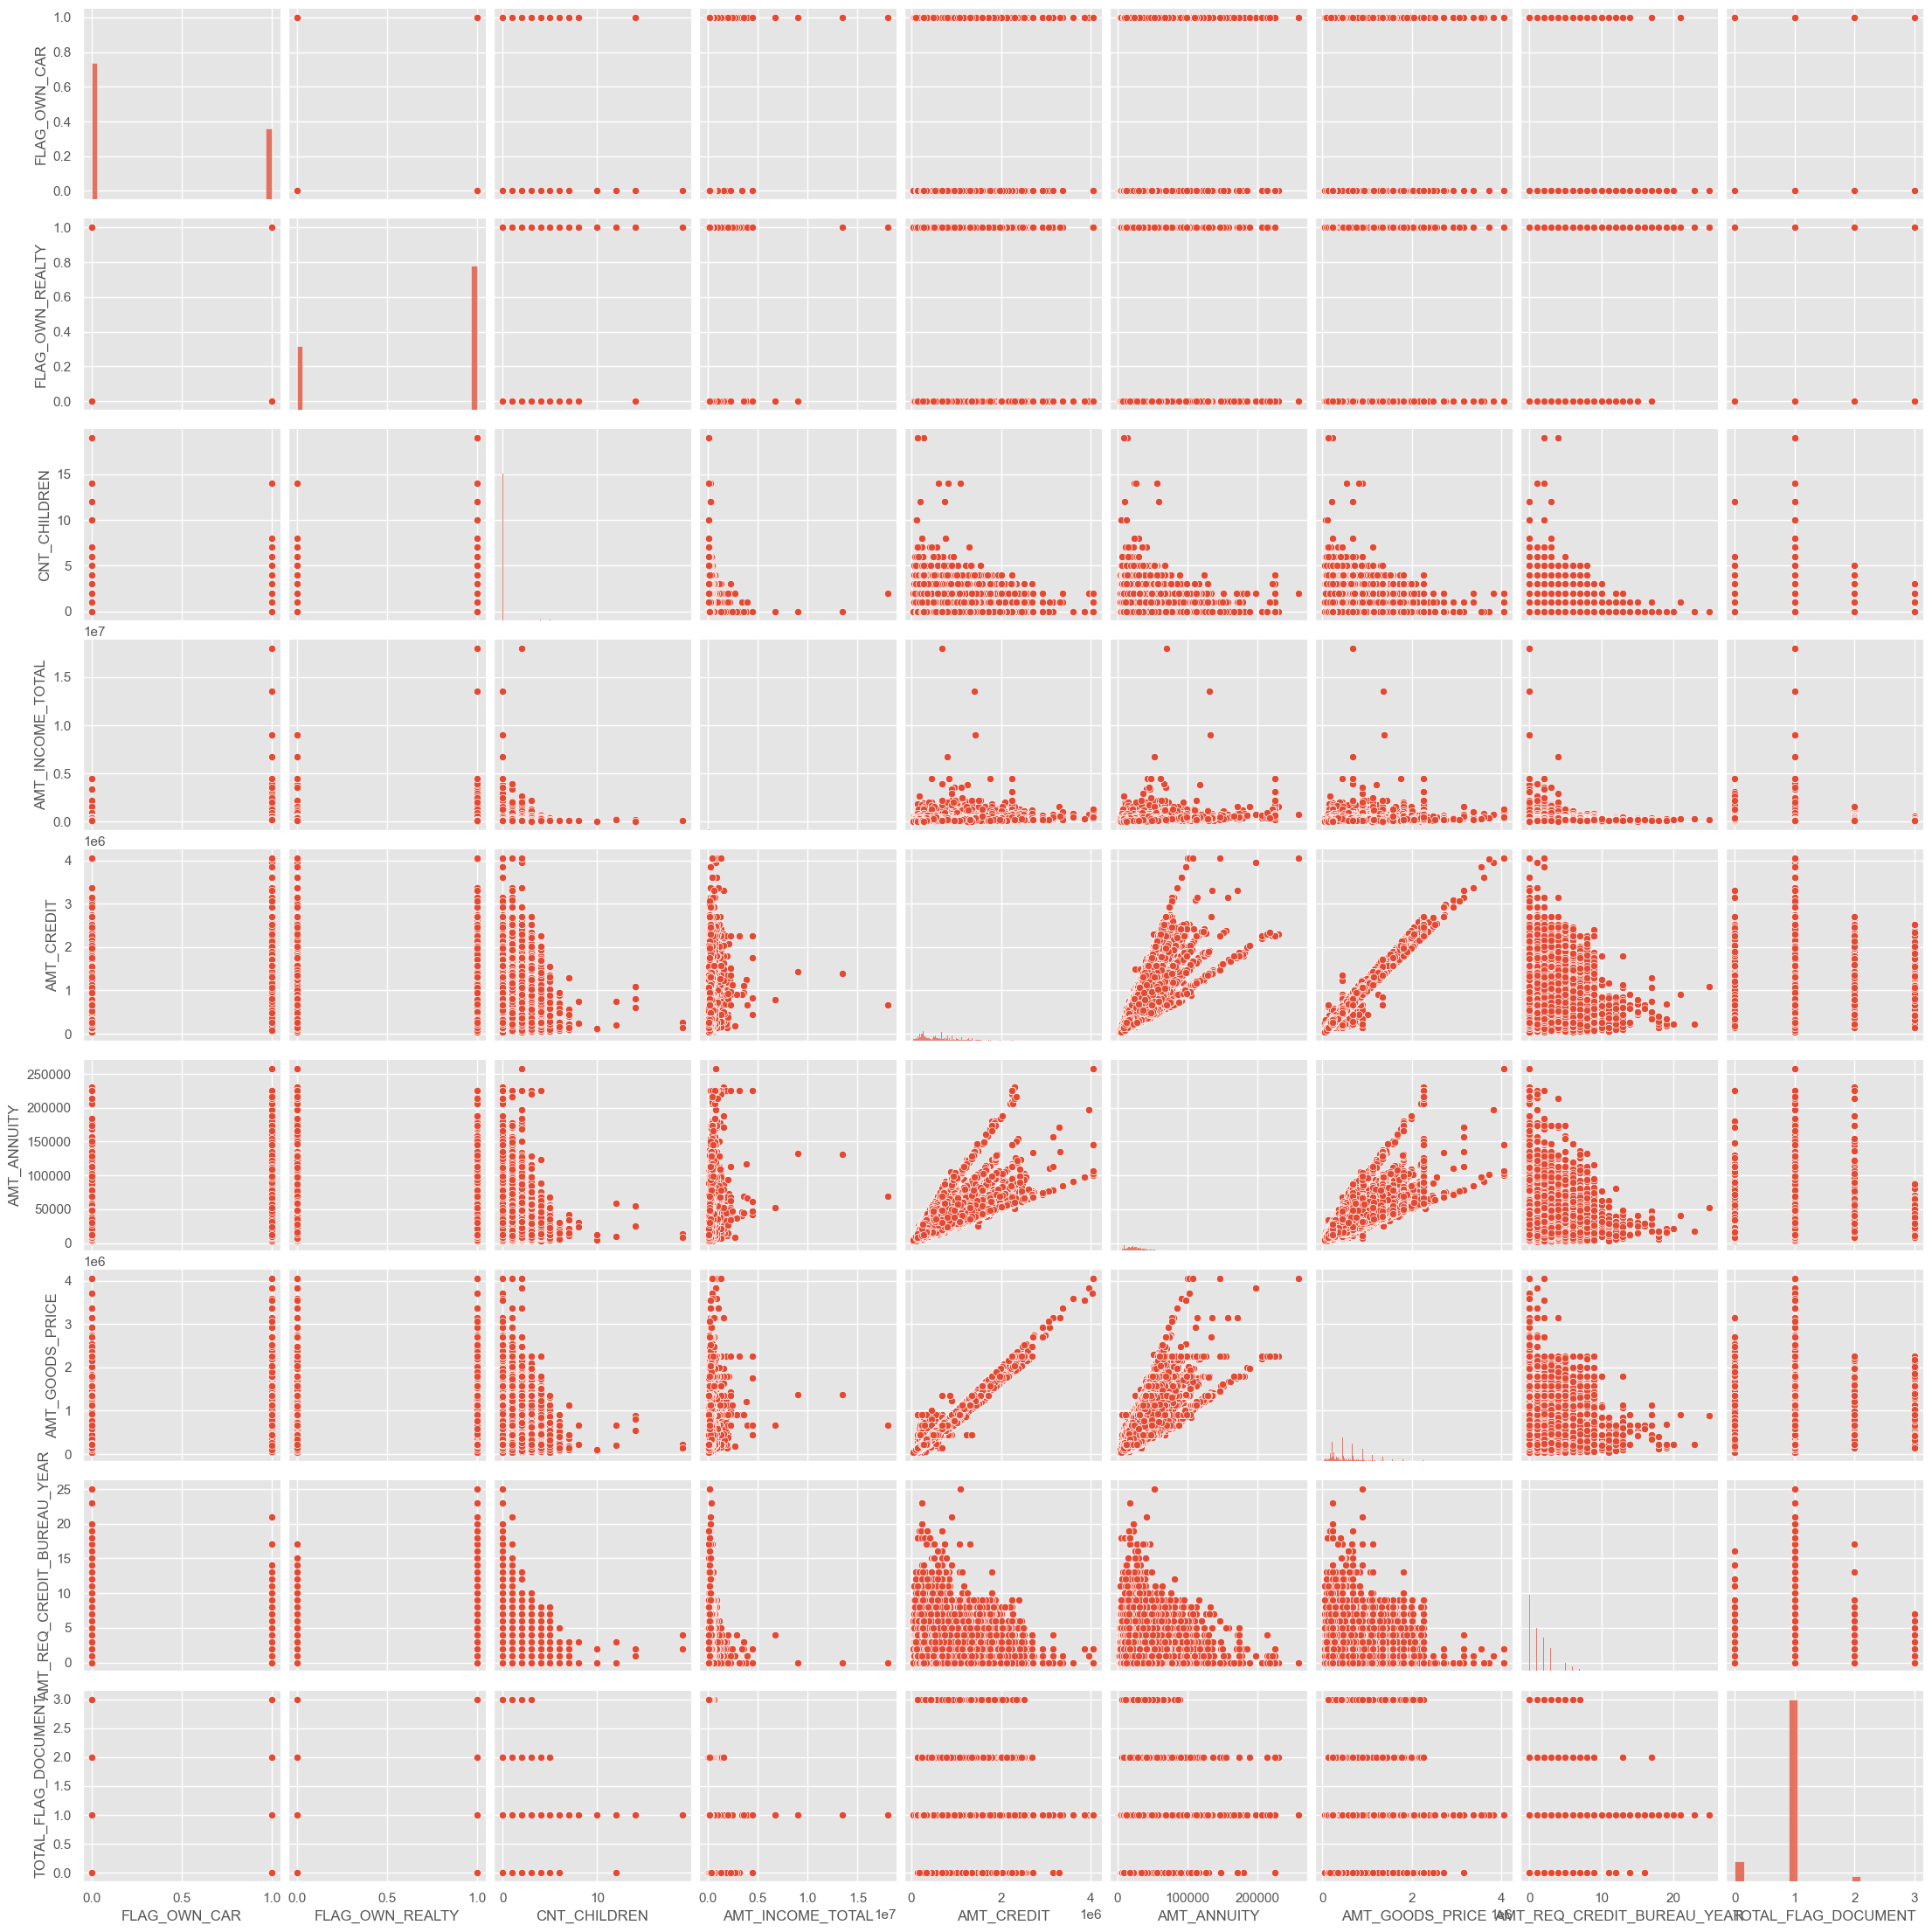

In [118]:
#Non- Defaulters
sns.pairplot(non_def_0[["FLAG_OWN_CAR","FLAG_OWN_REALTY","CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","AMT_REQ_CREDIT_BUREAU_YEAR","TOTAL_FLAG_DOCUMENT"]])
plt.show()

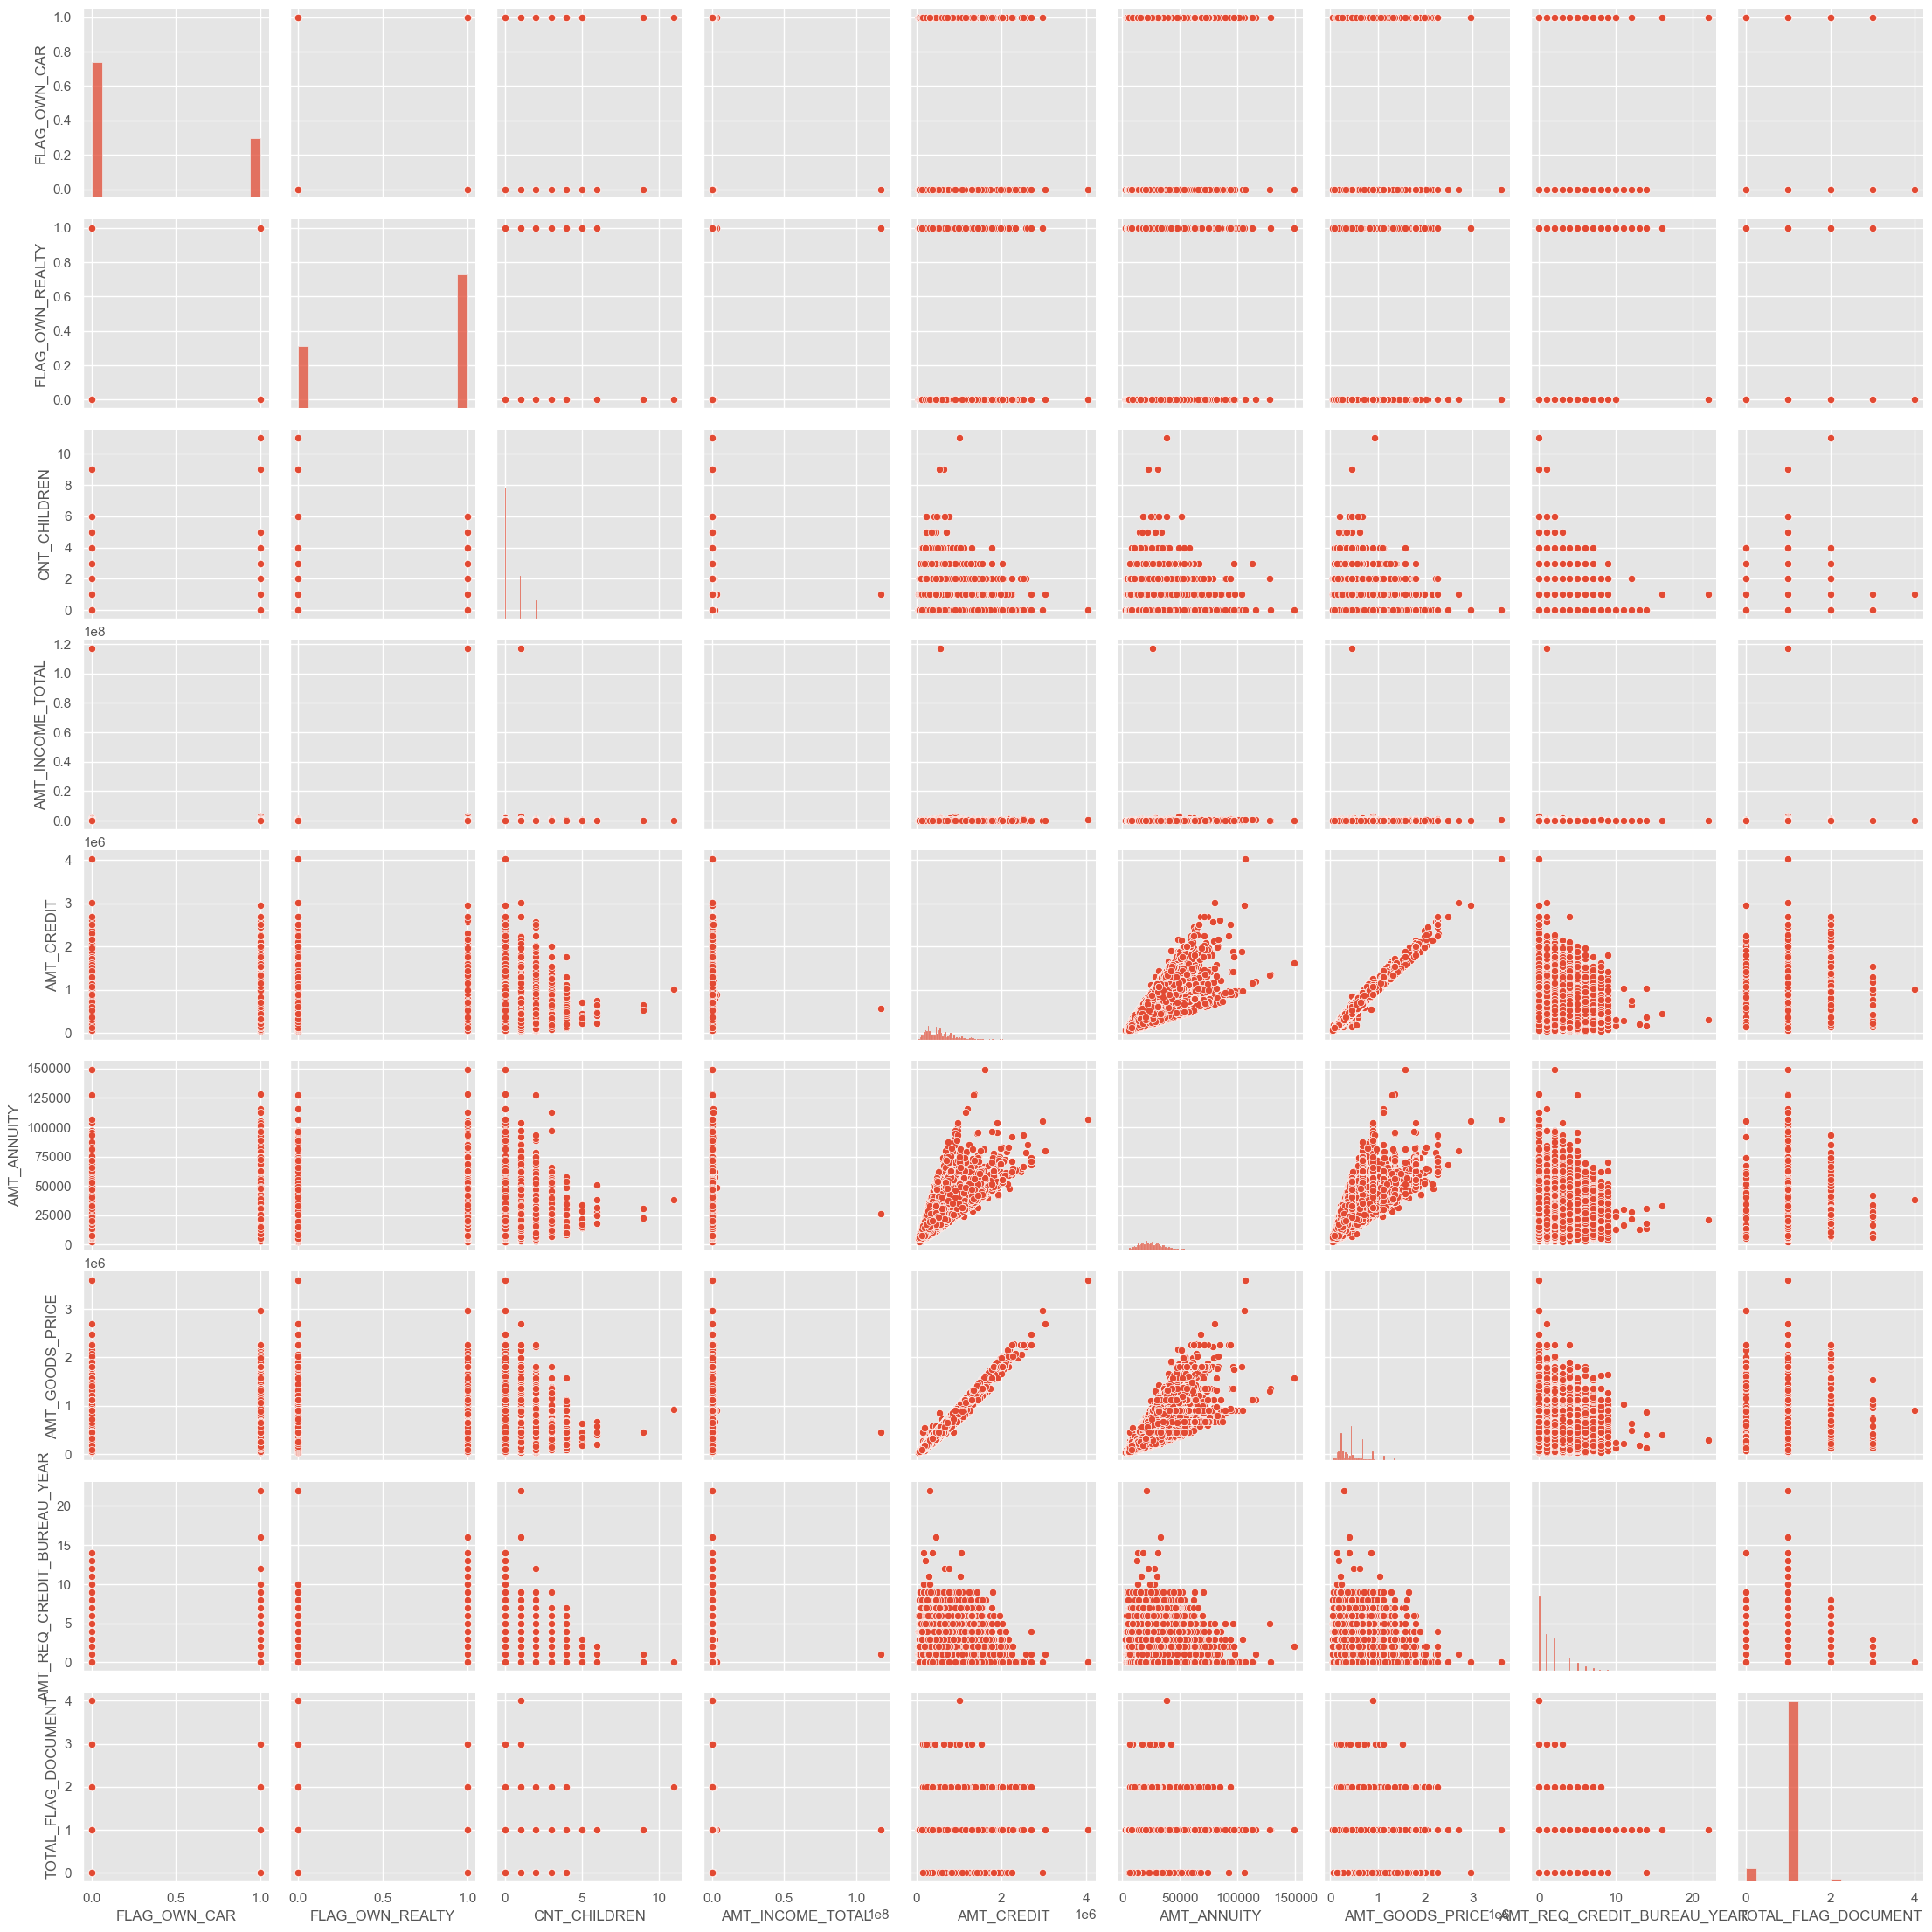

In [119]:
#Defaulters
sns.pairplot(def_1[["FLAG_OWN_CAR","FLAG_OWN_REALTY","CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","AMT_REQ_CREDIT_BUREAU_YEAR","TOTAL_FLAG_DOCUMENT"]])
plt.show()

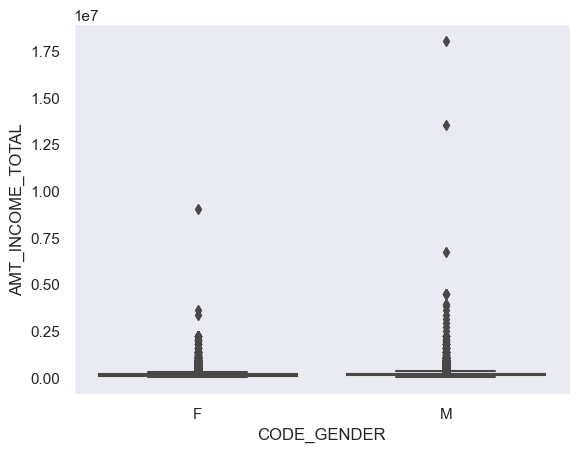

In [120]:
sns.set_style("dark")
sns.boxplot(data =non_def_0, x = "CODE_GENDER", y = "AMT_INCOME_TOTAL")
plt.show()

**Understanding previous_application data set**

In [121]:
inp1.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [122]:
pd.options.display.max_columns=37
inp1.head()


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

Let us drop the columns haveing more than 40% missing values.

In [123]:
values_missing = round(inp1.isna().sum()/len(inp1)*100,2)
values_missing = values_missing[values_missing.values>(0.40*len(values_missing))]
null_list1 = list(values_missing.index.values)
inp1.drop(labels = null_list1, axis = 1, inplace = True)



In [124]:
(inp1.isnull().sum()).sort_values(ascending=False)

PRODUCT_COMBINATION            346
AMT_CREDIT                       1
NAME_PAYMENT_TYPE                0
NAME_YIELD_GROUP                 0
NAME_SELLER_INDUSTRY             0
SELLERPLACE_AREA                 0
CHANNEL_TYPE                     0
NAME_PRODUCT_TYPE                0
NAME_PORTFOLIO                   0
NAME_GOODS_CATEGORY              0
NAME_CLIENT_TYPE                 0
CODE_REJECT_REASON               0
SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_STATUS             0
NAME_CASH_LOAN_PURPOSE           0
NFLAG_LAST_APPL_IN_DAY           0
FLAG_LAST_APPL_PER_CONTRACT      0
HOUR_APPR_PROCESS_START          0
WEEKDAY_APPR_PROCESS_START       0
AMT_APPLICATION                  0
NAME_CONTRACT_TYPE               0
DAYS_DECISION                    0
dtype: int64

In [125]:
inp1.PRODUCT_COMBINATION.value_counts(dropna = False)

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
NaN                                  346
Name: PRODUCT_COMBINATION, dtype: int64

In [126]:
inp1.PRODUCT_COMBINATION.fillna("Cash", inplace = True)

In [127]:
(inp1.isnull().sum()).sort_values(ascending=False)

AMT_CREDIT                     1
SK_ID_PREV                     0
NAME_PAYMENT_TYPE              0
NAME_YIELD_GROUP               0
NAME_SELLER_INDUSTRY           0
SELLERPLACE_AREA               0
CHANNEL_TYPE                   0
NAME_PRODUCT_TYPE              0
NAME_PORTFOLIO                 0
NAME_GOODS_CATEGORY            0
NAME_CLIENT_TYPE               0
CODE_REJECT_REASON             0
DAYS_DECISION                  0
SK_ID_CURR                     0
NAME_CONTRACT_STATUS           0
NAME_CASH_LOAN_PURPOSE         0
NFLAG_LAST_APPL_IN_DAY         0
FLAG_LAST_APPL_PER_CONTRACT    0
HOUR_APPR_PROCESS_START        0
WEEKDAY_APPR_PROCESS_START     0
AMT_APPLICATION                0
NAME_CONTRACT_TYPE             0
PRODUCT_COMBINATION            0
dtype: int64

In [128]:
inp1.dropna(subset=['AMT_CREDIT'], inplace = True)

In [129]:
(inp1.isnull().sum()).sort_values(ascending=False)

SK_ID_PREV                     0
NAME_PAYMENT_TYPE              0
NAME_YIELD_GROUP               0
NAME_SELLER_INDUSTRY           0
SELLERPLACE_AREA               0
CHANNEL_TYPE                   0
NAME_PRODUCT_TYPE              0
NAME_PORTFOLIO                 0
NAME_GOODS_CATEGORY            0
NAME_CLIENT_TYPE               0
CODE_REJECT_REASON             0
DAYS_DECISION                  0
SK_ID_CURR                     0
NAME_CONTRACT_STATUS           0
NAME_CASH_LOAN_PURPOSE         0
NFLAG_LAST_APPL_IN_DAY         0
FLAG_LAST_APPL_PER_CONTRACT    0
HOUR_APPR_PROCESS_START        0
WEEKDAY_APPR_PROCESS_START     0
AMT_CREDIT                     0
AMT_APPLICATION                0
NAME_CONTRACT_TYPE             0
PRODUCT_COMBINATION            0
dtype: int64

In [130]:
merged_data = pd.merge(inp0,inp1, how = "left", on = "SK_ID_CURR")
merged_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1           Cash loans           M             0   
1      100003       0           Cash loans           F             0   
2      100003       0           Cash loans           F             0   
3      100003       0           Cash loans           F             0   
4      100004       0      Revolving loans           M             1   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY  \
0                1             0          202500.0      406597.5      24700.5   
1                0             0          270000.0     1293502.5      35698.5   
2                0             0          270000.0     1293502.5      35698.5   
3                0             0          270000.0     1293502.5      35698.5   
4                1             0           67500.0      135000.0       6750.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2        1129500.0          Family    State servant   
3        1129500.0          Family    State servant   
4         135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  ...  \
0                    0.018801            637  ...   
1                    0.003541           1188  ...   
2                    0.003541           1188  ...   
3                    0.003541           1188  ...   
4                    0.010032            225  ...   

   WEEKDAY_APPR_PROCESS_START_y  HOUR_APPR_PROCESS_START_y  \
0                      SATURDAY                        9.0   
1                        FRIDAY                       12.0   
2                        SUNDAY                       17.0   
3                      SATURDAY                       15.0   
4                        FRIDAY                        5.0   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE  \
0                           Y                     1.0                    XAP   
1                           Y                     1.0                    XNA   
2                           Y                     1.0                    XAP   
3                           Y                     1.0                    XAP   
4                           Y                     1.0                    XAP   

   NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0              Approved         -606.0                    XNA   
1              Approved         -746.0                    XNA   
2              Approved         -828.0  Cash through the bank   
3              Approved        -2341.0  Cash through the bank   
4              Approved         -815.0  Cash through the bank   

   CODE_REJECT_REASON  NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY  NAME_PORTFOLIO  \
0                 XAP               New              Vehicles             POS   
1                 XAP          Repeater                   XNA            Cash   
2                 XAP         Refreshed             Furniture             POS   
3                 XAP         Refreshed  Consumer Electronics             POS   
4                 XAP               New                Mobile             POS   

  NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  \
0               XNA                    Stone             500.0   
1            x-sell  Credit and cash offices              -1.0   
2               XNA                    S

In [131]:
merged_data.shape

(1430154, 69)

****************************************************    THANKYOU *********************************************************